# New additions for the Final submission begin at the "ANCOVA" section. Command+F to "Final Submission begins here" for new information. 

# Additional cells added to correct for midterm feedback are marked as "Midterm Additions".

# Thank you!

In [27]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("diabetes.csv") 
#The objective is to explore and rank the relationships between attributes, when accounting for Diabetes status

In [28]:
print(data.shape)
data.head(20)

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [29]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [30]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [31]:
headers = data.columns.tolist()
headers.pop(-1)
headers #list of the 8 attributes, so I can loop over this later

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

FROM KAGGLE METADATA

Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [32]:
#now replacing '0' values in Glucose, BP, ST, and BMI with the mean based on Outcome:
print(data['Glucose'].value_counts().sort_index())

0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64


In [33]:
#there are 5 '0' values
#finding mean for Glucose for each outcome:
dfglucose = data[data['Glucose'] != 0.0]
(a, b) = dfglucose.groupby('Outcome')['Glucose'].mean()
print(a, b)
#a and b are the means for the Glucose column, 'a' being those of Outcome = 0, and 'b' for those of Outcome = 1.

110.64386317907444 142.31954887218046


In [34]:
def fill_null(data, a, b, index, column_name): #user-defined function to replace '0' values with means of the column
    for i, r in data.iterrows():               #depending on the observation's Outcome value
        if r[index] == 0 and r[8] == 0.0:
            data.loc[i,column_name] = a
        elif r[index] == 0 and r[8] == 1.0:
            data.loc[i,column_name] = b
            
fill_null(data, a, b, 1, 'Glucose')  #replacing errors in 'Glucose' column with means of Outcome group
print(data['Glucose'].value_counts().sort_index())

44.0     1
56.0     1
57.0     2
61.0     1
62.0     1
        ..
195.0    2
196.0    3
197.0    4
198.0    1
199.0    1
Name: Glucose, Length: 137, dtype: int64


In [35]:
#now replacing '0' values of BloodPressure with the mean based on Outcome:
print(data['BloodPressure'].value_counts().sort_index())

#now replacing all '0' values with mean:
dfbp = data[data['BloodPressure'] != 0.0]
(a,b) = dfbp.groupby('Outcome')['BloodPressure'].mean()
print(a,b)

#replacing errors in 'BloodPressure' column with means of Outcome group
fill_null(data, a, b, 2, 'BloodPressure')  
print(data['BloodPressure'].value_counts().sort_index())

0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64
70.87733887733887 75.32142857142857
24.000000      1
30.000000      2
38.000000      1
40.000000      1
44.000000      4
46.000000      2
48.000000      5
50.000000     13
52.000000     11
54.000000     11
55.000000      2
56.000000     12
58.000000     21
60.000000     37
61.000000      1
62.000000     34
64.000000     43
65.000000      7
66.000000     30
68.000000     45
70.000000     57
70.877339     19
72.000000     44
74.000000     52
75.000000      8
75.321429     16
76.000000     39
7

In [36]:
#now replacing '0' values of SkinThickness with the mean based on Outcome:
print(data['SkinThickness'].value_counts().sort_index())

dfst = data[data['SkinThickness'] != 0.0]
(a,b) = dfst.groupby('Outcome')['SkinThickness'].mean()
print(a,b)

#replacing errors in 'SkinThickness' column with means of Outcome group
fill_null(data, a, b, 3, 'SkinThickness')  
print(data['SkinThickness'].value_counts().sort_index())

0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64
27.235457063711912 33.0
7.000000       2
8.000000       2
10.000000      5
11.000000      6
12.000000      7
13.000000     11
14.000000      6
15.000000     14
16.000000      6
17.000000     14
18.000000     20
19.000000     18
20.000000     13
21.000000     10
22.000000     16
23.000000     22
24.000000     12
25.000000     16
26.000000     16
27.000000     23
27.235457    139
28.000000     20
29.000000     17
30.000000     27
31.000000     19
32.0000

In [37]:
#can confirm each worked by adding the numbers of each mean present in the attribute column for outcomes 1 and 0
    #summing to the overall number of 0's seen in values_count().sort_index()

In [38]:
#now replacing '0' values of BMI with the mean based on Outcome:
print(data['BMI'].value_counts().sort_index())

dfbmi = data[data['BMI'] != 0.0]
(a,b) = dfbmi.groupby('Outcome')['BMI'].mean()
print(a,b)

#replacing errors in 'BMI' column with means of Outcome group
fill_null(data, a, b, 5, 'BMI')  
print(data['BMI'].value_counts().sort_index())

0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64
30.859674134419553 35.40676691729323
18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 249, dtype: int64


In [39]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6    148.0      72.000000      35.000000        0  33.600000   
1            1     85.0      66.000000      29.000000        0  26.600000   
2            8    183.0      64.000000      33.000000        0  23.300000   
3            1     89.0      66.000000      23.000000       94  28.100000   
4            0    137.0      40.000000      35.000000      168  43.100000   
5            5    116.0      74.000000      27.235457        0  25.600000   
6            3     78.0      50.000000      32.000000       88  31.000000   
7           10    115.0      70.877339      27.235457        0  35.300000   
8            2    197.0      70.000000      45.000000      543  30.500000   
9            8    125.0      96.000000      33.000000        0  35.406767   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [40]:
print(data['DiabetesPedigreeFunction'].value_counts().sort_index())
print(data['Age'].value_counts().sort_index())
#checking if there are '0' values in these columns
#there are not so I can move on from data cleaning
#Cleaning Complete!

0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64


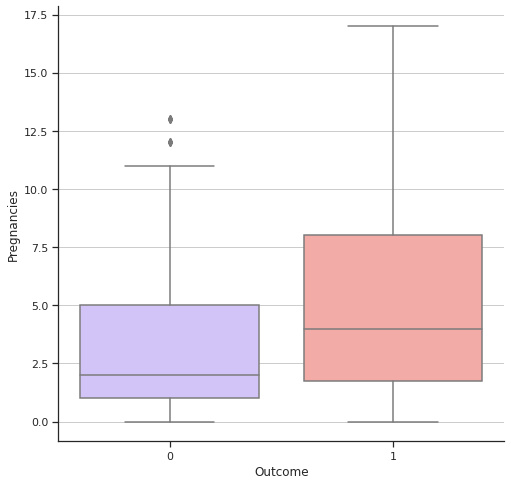

In [41]:
#visualizing each attribute, grouping by Outcome, to compare distributions of each attribute and see how the means
    #differ depending on whether someone has diagnosed diabetes or not:

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="Outcome", y="Pregnancies", palette=["m", "r"], data=data)
sns.despine(offset=0)

#this boxplot allows us to see the distributions of pregnancies, based on Outcome
#this is beneficial for when I perform the ANOVAs, since I can now split the 'number of pregnancies' into groups 
    #based on this distribution

In [42]:
#I can see that the medians of both groups are around 2 and 4
#the groups I will divide the Pregnancies into are [0-1], [2-3], [4-6], [7+]
#I will come back and revise these groups later, if needed
#now I need to add another column to the dataframe that includes the "Group #" for the Pregnancies value
    #basically I am "binning" right now:

#function to make subgroups of each attribute:

def new_column(data, row_number, value1, value2, value3):
    new_list = [None]*len(data)
    i=0
    for index, r in data.iterrows():
        if r[row_number] < (float(value1)+0.1):
            new_list[i] = ('0-'+str(value1))
            i+=1
        elif r[row_number] >= (float(value1)+0.1) and r[row_number] < (float(value2)+0.1):
            new_list[i] = (str(value1)+'-'+str(value2))
            i+=1
        elif r[row_number] >= (float(value2)+0.1) and r[row_number] < (float(value3)+0.1):
            new_list[i] = (str(value2)+'-'+str(value3))
            i+=1
        elif r[row_number] >= (float(value3)+0.1):
            new_list[i] = (str(value3)+'+')
            i+=1
    return(new_list)

#Pregnancies, this attribute is odd due to integers instead of floats

data['PregnancyGroupings'] = new_column(data, 0, 1.9, 3.9, 6.9)
print(data['PregnancyGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-1.9      246
1.9-3.9    178
3.9-6.9    175
6.9+       169
Name: PregnancyGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings  
0                     0.627   50        1            3.9-6.9  
1                     0.351   31        0              0-1.9  
2                     0.672   32        1               6.9+  
3                     0.167   21        0              0-1.9  
4                     2.288   33        1              0-1.9

0-98       175
115-140    203
140+       194
98-115     196
Name: GlucoseGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  
0                     0.627   50        1            3.9-6.9             140+  
1                     0.351   31        0              0-1.9             0-98  
2                     0.672   32        1               6.9+             140+  
3                     0.167   21        0              0-1.9             0-98  
4                     2.288   33        1              0-1.9          115-140

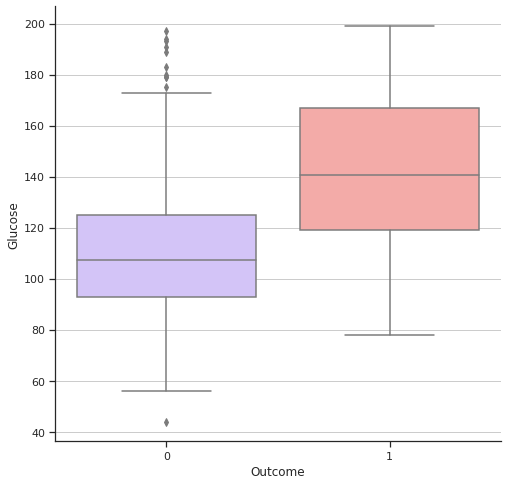

In [43]:
#now repeat for each of the other columns: (summarized in single cells for the sake of space/time)
#procedure for each attribute is to first visualize with a boxplot, then visually divide the range into 4 subgroups 
    #based on where the average (between the two Outcomes) quartiles and whiskers are placed, then to input these 
    #numbers into the new_column function, evaluating the number of observations in each bin and changing the bin 
    #boundaries through trial and error until the bins are approximately equal in size:

#Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="Outcome", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['GlucoseGroupings'] = new_column(data, 1, 98, 115, 140)
print(data['GlucoseGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-65     208
65-72    195
72-80    200
80+      165
Name: BPGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings  
0       65-72  
1       65-72  
2        0-65  
3       65-72  
4        0-65

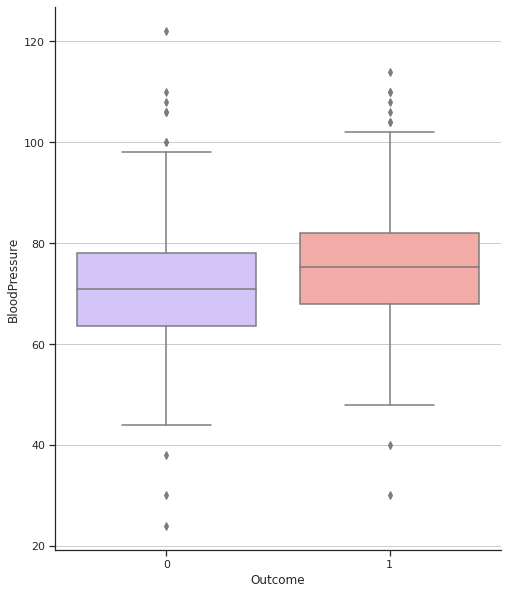

In [44]:
#BloodPressure

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,10))
plt.grid()
sns.boxplot(x="Outcome", y="BloodPressure", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['BPGroupings'] = new_column(data, 2, 65, 72, 80)
print(data['BPGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-20     124
20-25     76
25-35    423
35+      145
Name: STGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings  
0       65-72       25-35  
1       65-72       25-35  
2        0-65       25-35  
3       65-72       20-25  
4        0-65       25-35

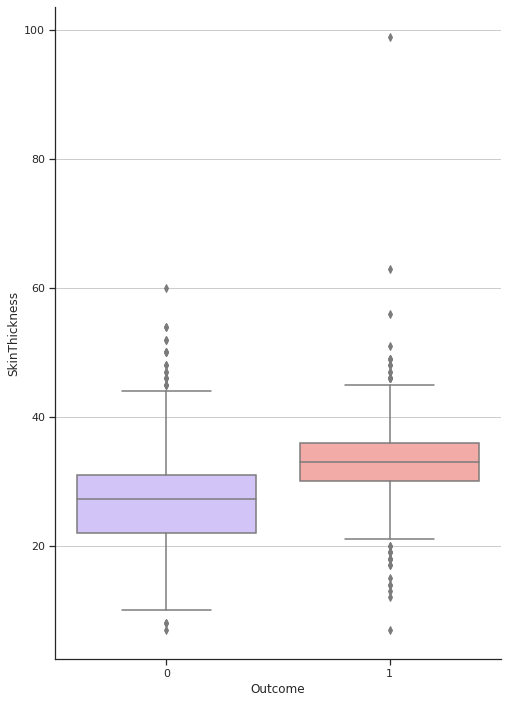

In [45]:
#SkinThickness

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="SkinThickness", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['STGroupings'] = new_column(data, 3, 20, 25, 35)
print(data['STGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-0.1     374
0.1-80    105
150+      153
80-150    136
Name: InsulinGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings  
0       65-72       25-35            0-0.1  
1       65-72       25-35            0-0.1  
2        0-65       25-35            0-0.1  
3       65-72       20-25           80-150  
4        0-65       25-35             150+

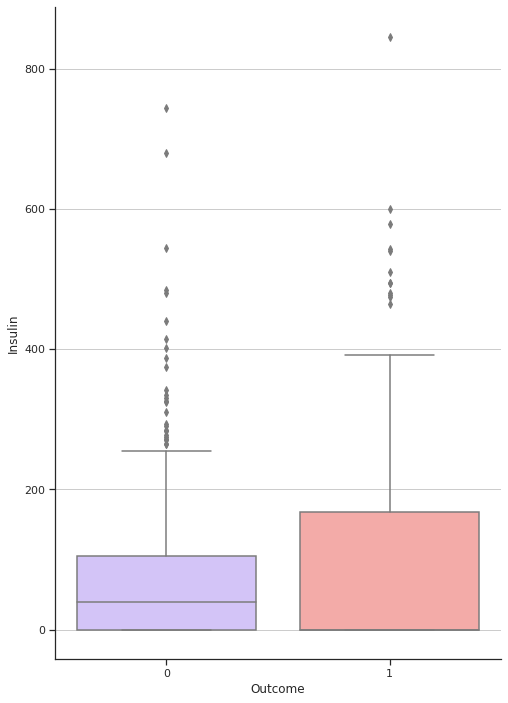

In [46]:
#Insulin     
            
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="Insulin", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['InsulinGroupings'] = new_column(data, 4, 0.1, 80, 150)
print(data['InsulinGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head() #0-0.1 group is basically a group of people with 0 insulin

0-20      14
20-25     98
25-30    180
30+      476
Name: BMIGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings  
0       65-72       25-35            0-0.1          30+  
1       65-72       25-35            0-0.1        25-30  
2        0-65       25-35            0-0.1        20-25  
3       65-72       20-25           80-150        25-30  
4        0-65       25-35             150+          30+

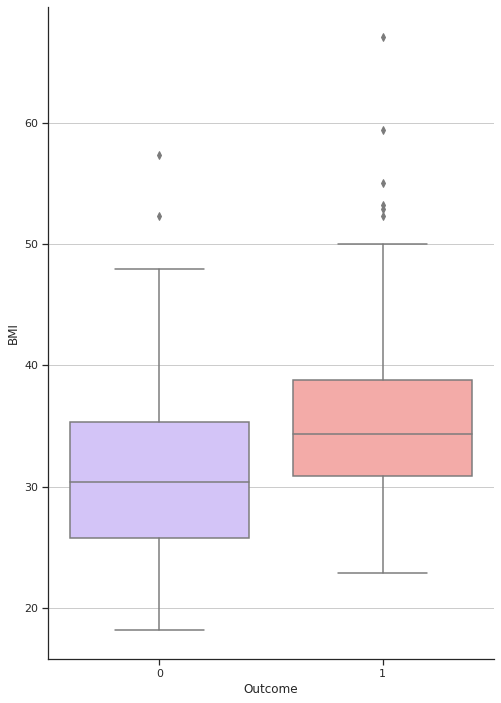

In [47]:
#BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['BMIGroupings'] = new_column(data, 5, 20, 25, 30) #grouped according to US standards
print(data['BMIGroupings'].value_counts().sort_index()) #see how many entries are in each group
data.head()
#source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/english_bmi_calculator/bmi_calculator.html

0-0.15      205
0.15-0.3    203
0.3-0.55    181
0.55+       179
Name: DFPGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings DFPGroupings  
0       65-72       25-35            0-0.1          30+     0.3-0.55  
1       65-72       25-35            0-0.1        25-30     0.15-0.3  
2        0-65       25-35            0-0.1        20-25        0.55+  
3       65-72       20-25           80-150        25-30       0-0.15  
4        0-65       25-35             150+          30+        0.55+

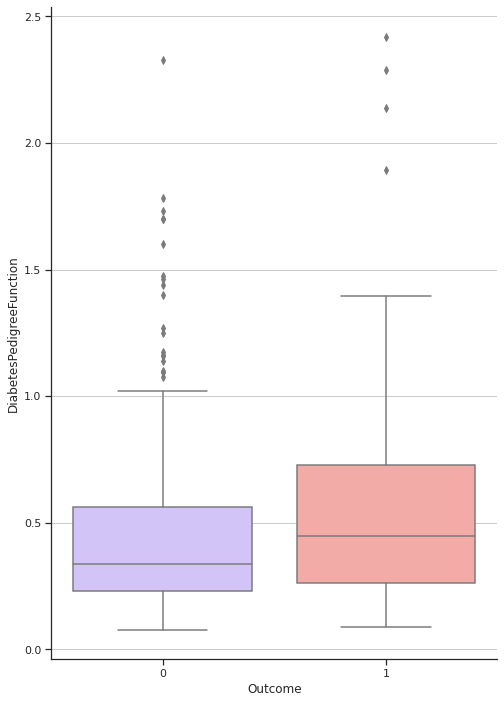

In [48]:
#DiabetesPedigreeFunction

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['DFPGroupings'] = new_column(data, 6, .15, .3, .55)
print(data['DFPGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-25     267
25-30    150
30-40    157
40+      194
Name: AgeGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings DFPGroupings  \
0       65-72       25-35            0-0.1          30+     0.3-0.55   
1       65-72       25-35            0-0.1        25-30     0.15-0.3   
2        0-65       25-35            0-0.1        20-25        0.55+   
3       65-72       20-25           80-150        25-30       0-0.15   
4        0-65       25-35             150+          30+        0.55+   

  AgeGroupings  
0          40+  
1        30-40  
2        30-40  
3         0-25  
4        30-40

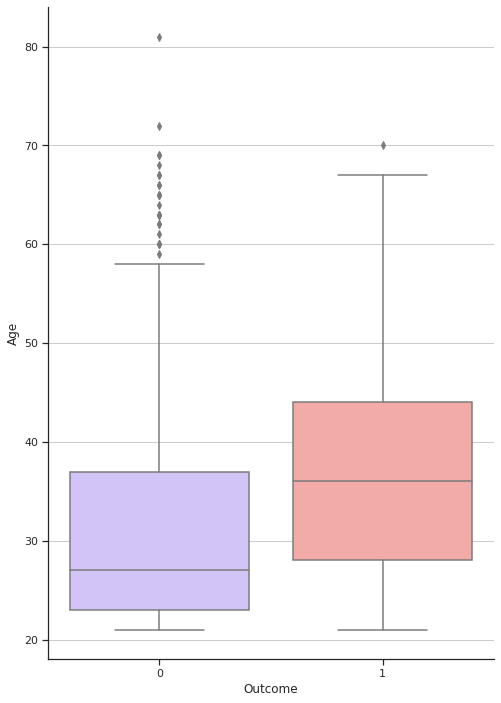

In [49]:
#Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['AgeGroupings'] = new_column(data, 7, 25, 30, 40)
print(data['AgeGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

In [50]:
datafinal = data #copying for later, this is final set-up of data

In [51]:
#now testing two assumptions of GLMs:
#1. Assumption of normality for each attribute
#2. Test of homogeneity of variance for each attribute

#1. with alpha = 0.05

def shapiro_function(column_name):
    return stats.shapiro(data[column_name])

for name in headers:
    print(name + "  :  " + str(shapiro_function(name)))

#very small pvalue suggests 'Pregnancies' is not a normally distributed value, this makes sense since
    #it should be a very right skewed statistic (cannnot have negative number of pregnancies)
#I reject the null hypothesis for all attributes, rejecting that the data is from a normal distribution
    #as expected, I do not have perfectly normally distributed data, but c'est la vie, moving on..

Pregnancies  :  ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)
Glucose  :  ShapiroResult(statistic=0.9699075818061829, pvalue=1.782425942953303e-11)
BloodPressure  :  ShapiroResult(statistic=0.9886093139648438, pvalue=1.1095724403276108e-05)
SkinThickness  :  ShapiroResult(statistic=0.9526727199554443, pvalue=5.367789241252693e-15)
Insulin  :  ShapiroResult(statistic=0.7220207452774048, pvalue=7.915248149269491e-34)
BMI  :  ShapiroResult(statistic=0.9794151186943054, pvalue=6.3127774119209334e-09)
DiabetesPedigreeFunction  :  ShapiroResult(statistic=0.8365186452865601, pvalue=2.477696547502535e-27)
Age  :  ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)


In [52]:
#2. Pregnancies: (alpha = 0.05)

!pip install bioinfokit
from bioinfokit.analys import stat

def variance_test(data, res_var, xfac_var):
    res=stat()
    res.levene(df=data, res_var = res_var, xfac_var = xfac_var)
    return(res.levene_summary)

for name in headers:
    print(name + "  :  " + str(variance_test(data, name, "Outcome")))

#a pvalue of 0.0000 suggests I do reject H0 (variances are the same)
#shows that variances are statistically different from each other (not ideal)

#there is a mix of data with statistically different means based on Outcome, and those for which this is not true
    #not ideal in real practice
    #attributes that potentially have consistent variance are BloodPressure, BMI, Age

Processing /home/jovyan/.cache/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2/bioinfokit-2.0.8-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/fb/24/13/4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f/matplotlib_venn-0.11.7-py3-none-any.whl
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
Processing /home/jovyan/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63/adjustText-0.7.3-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Pregnancies  :                   Parameter    Value
0      Test statistics (W)  22.7472
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
Glucose  :                   Parameter    Value
0      Test statistics (W)  22.9758
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
BloodPressure  :                   Parameter   Value
0      Test statistics (W)  0.2383
1  Degrees of freedom (Df)  1.0000
2                  p value  0.62

In [53]:
#t-tests:

def t_test_function(column_name):
    return ttest_ind(*data.groupby('Outcome')[column_name].apply(lambda a:list(a))) #assumes equal variance of samples

for name in headers:
    print(name + "  :  " + str(t_test_function(name)))
        
#I can see that all H0's (means for the attribute are identical for each group of Outcomes) are rejected for the 
    #attributes I have

Pregnancies  :  Ttest_indResult(statistic=-6.298430550035151, pvalue=5.065127298053476e-10)
Glucose  :  Ttest_indResult(statistic=-15.807451449039215, pvalue=6.342123143758429e-49)
BloodPressure  :  Ttest_indResult(statistic=-4.921868510389964, pvalue=1.050055667491212e-06)
SkinThickness  :  Ttest_indResult(statistic=-8.963039398250602, pvalue=2.379422973455058e-18)
Insulin  :  Ttest_indResult(statistic=-3.64432538765356, pvalue=0.00028618646036031987)
BMI  :  Ttest_indResult(statistic=-9.194582155497818, pvalue=3.487255859728982e-19)
DiabetesPedigreeFunction  :  Ttest_indResult(statistic=-4.88582646072744, pvalue=1.254607010148809e-06)
Age  :  Ttest_indResult(statistic=-6.792688071649956, pvalue=2.2099754606654358e-11)


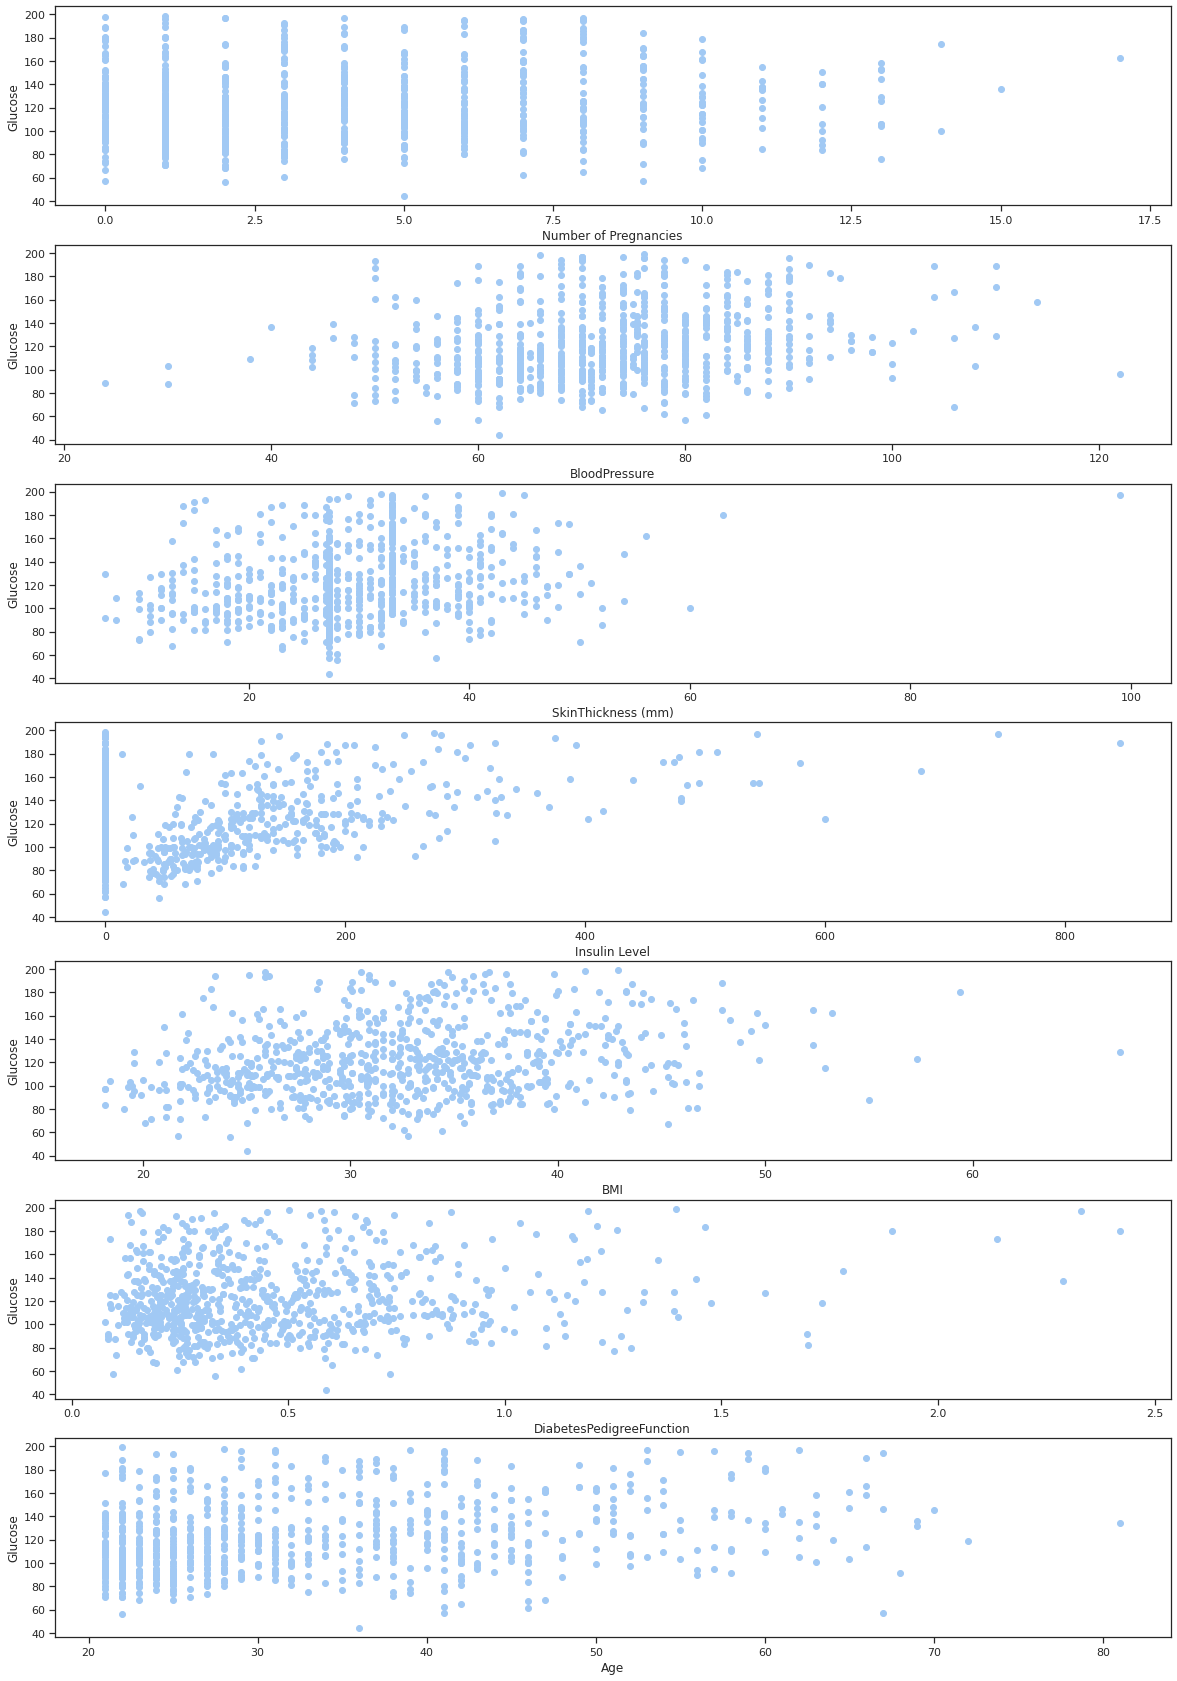

In [54]:
#I can see from the t-test results that the Glucose column has the most distinct means between Outcomes, based
    #on p-value

#my aim is to make a MLR model to predict Glucose based on various combinations of the other columns
    #one assumption of MLR is a linear relationship between dependent and independent variables, which I test
    #by constructing multiple scatter plots for the numerical variables (attribtues)
    
fig, ax = plt.subplots(7, 1, figsize=(20, 30))
ax[0].scatter(x = data['Pregnancies'], y = data['Glucose'])
ax[0].set_xlabel("Number of Pregnancies") #categorical variable disguised as numerical, no distinct correlation
ax[0].set_ylabel("Glucose")

ax[1].scatter(x = data['BloodPressure'], y = data['Glucose'])
ax[1].set_xlabel("BloodPressure") #no linear correlation seemingly present
ax[1].set_ylabel("Glucose")

ax[2].scatter(x = data['SkinThickness'], y = data['Glucose'])
ax[2].set_xlabel("SkinThickness (mm)") #no linear correlation seemingly present
ax[2].set_ylabel("Glucose")

ax[3].scatter(x = data['Insulin'], y = data['Glucose'])
ax[3].set_xlabel("Insulin Level") #vague linear correlation may be present, too many 0s to analyze accurately
ax[3].set_ylabel("Glucose")

ax[4].scatter(x = data['BMI'], y = data['Glucose'])
ax[4].set_xlabel("BMI") #no linear correlation seemingly present
ax[4].set_ylabel("Glucose")

ax[5].scatter(x = data['DiabetesPedigreeFunction'], y = data['Glucose'])
ax[5].set_xlabel("DiabetesPedigreeFunction") #no linear correlation seemingly present
ax[5].set_ylabel("Glucose")

ax[6].scatter(x = data['Age'], y = data['Glucose'])
ax[6].set_xlabel("Age") #categorical variable disguised as numerical, no distinct correlation
ax[6].set_ylabel("Glucose")

plt.show()

In [55]:
#single linear regression for each attribute on Glucose to assess linearity:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in headers:
    x = data[i].array.reshape(-1,1)
    y = data['Glucose'].array.reshape(-1,1)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('Coefficient of Determination for '+ i +" =", r_sq)
    
#can see that R^2 values are pretty low, consistent with scatterplot above (Glucose is obviously 1.0)

Coefficient of Determination for Pregnancies = 0.01686535777438891
Coefficient of Determination for Glucose = 1.0
Coefficient of Determination for BloodPressure = 0.05033545476983137
Coefficient of Determination for SkinThickness = 0.05524362633073954
Coefficient of Determination for Insulin = 0.10920459104172298
Coefficient of Determination for BMI = 0.05534391076599565
Coefficient of Determination for DiabetesPedigreeFunction = 0.0190785693312
Coefficient of Determination for Age = 0.07212765035734592


In [56]:
#moving on to Multiple Linear Regression:

#the t-tests above showed me that Glucose, Age, Pregnancies and BMI are the four attributes with strongest differences
    #in mean between those with diabetes, and those without
    
#what I want to answer from the MLR is do Age, Pregnancies and BMI predict Glucose better than all the attributes
    #in a model together (basically, do the other attributes take away from the predictive power of the first 3)?

#I will be making two MLR models, one with 3 numerical predictors + Outcome class, and one with 7 numerical predictors
    #+ Outcome class:
    
X = data[['Pregnancies', 'BMI', 'Age', 'Outcome']]
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=None) #test is 20% of full dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

Actual   Predicted
69    146.0  106.322458
741   102.0  107.497174
357   129.0  141.199069
642   147.0  144.074223
614   138.0  143.574234
..      ...         ...
263   142.0  125.067331
292   128.0  144.902202
485   135.0  142.700627
567    92.0  114.973256
117    78.0  106.966307

[154 rows x 2 columns]

In [57]:
#MIDTERM ADDITIONS

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df #these are the parameter estimates for the regression equation y = b0 + b1X1 + b2X2 + b3X3 + b4X4

Coefficient
Pregnancies    -0.726814
BMI             0.474861
Age             0.454335
Outcome        28.470780

In [58]:
#MIDTERM ADDITIONS

print(regressor.intercept_) #beta0

83.23920269591503


In [59]:
from sklearn import metrics
import numpy as np

print('MAE for the 3 numerical predictors is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for the 3 numerical predictors is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for the 3 numerical predictors is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for the 3 numerical predictors is: 19.521709572614274
MSE for the 3 numerical predictors is: 620.8830881531669
RMSE for the 3 numerical predictors is: 24.917525722935792


In [60]:
#now comparing to a full model, using all columns of the dataset:

X = data[['Pregnancies', 'BMI', 'Age', 'Outcome', 'BloodPressure', 'SkinThickness', 'Insulin', 
          'DiabetesPedigreeFunction']]
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=None) #test is 20% of full dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

dffull = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dffull

Actual   Predicted
119    99.0  103.951963
211   147.0  112.621808
600   108.0  108.072049
11    168.0  129.083311
244   146.0  122.423842
..      ...         ...
725   112.0  112.537692
691   158.0  143.506696
450    82.0  106.533380
615   106.0  104.332875
759   190.0  152.559466

[154 rows x 2 columns]

In [61]:
#MIDTERM ADDITIONS

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df #these are the parameter estimates for the regression equation y = b0 + b1X1 + b2X2 + b3X3 + b4X4 + b5x5 
    #+ b6X6 + b7X7 + b8X8 

Coefficient
Pregnancies                 -0.695717
BMI                         -0.000171
Age                          0.486601
Outcome                     24.541101
BloodPressure                0.297381
SkinThickness                0.136320
Insulin                      0.072512
DiabetesPedigreeFunction     0.892851

In [62]:
#MIDTERM ADDITIONS

print(regressor.intercept_) #beta0

67.97718650393503


In [63]:
print('MAE for the full columns model is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for the full columns model is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for the full columns model is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for the full columns model is: 20.366436432639578
MSE for the full columns model is: 650.7125047500022
RMSE for the full columns model is: 25.5090671085793


In [64]:
#I can see that including the columns with less powerful t-test results still yields a stronger predictive model
    #than just a few attributes for the Glucose column values
    
#moving on to one-way ANOVA...

In [65]:
#using the categorical groups I created for each attribute, now doing one-way ANOVAs with certain pairs of attributes
    #to examine the strength of their relationship (metric being p-value)

#Glucose by far seemed to have the largest difference in means, dependent on Diabetes class, so this is the 
    #attribute I will focus most on
    
#there are seemingly an infinite number of analyses that could be done with this dataset, this will be my focus
#this is where I will start, by doing one-way ANOVAs between these 4 attributes:

!pip install pingouin
import pingouin as pg

def one_way_ANOVA(dv, between):
    print(pg.anova(data=data, dv = dv, between = between, detailed = True))

Processing /home/jovyan/.cache/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e/pingouin-0.5.1-py3-none-any.whl
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
Processing /home/jovyan/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a/littleutils-0.2.2-py3-none-any.whl


             Source           SS   DF         MS         F     p-unc       np2
0  GlucoseGroupings   170.710040    3  56.903347  5.091932  0.001705  0.019603
1            Within  8537.851158  764  11.175198       NaN       NaN       NaN


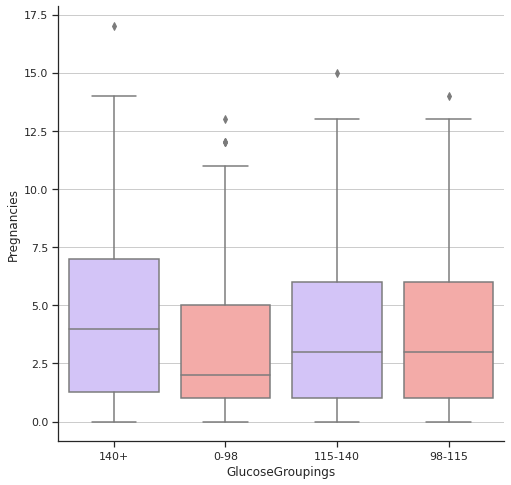

In [66]:
#user-defined function has been defined, now visualizing number of Pregnancies by Glucose categorical groups:

#1. GlucoseGroupings, Pregnancies

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="Pregnancies", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Pregnancies', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                                 #categorical level of Glucose

#is this relationship statistically similar the other way around?:

               Source             SS   DF           MS         F     p-unc  \
0  PregnancyGroupings   19768.328308    3  6589.442769  7.275502  0.000082   
1              Within  691956.982406  764   905.702857       NaN       NaN   

        np2  
0  0.027775  
1       NaN  


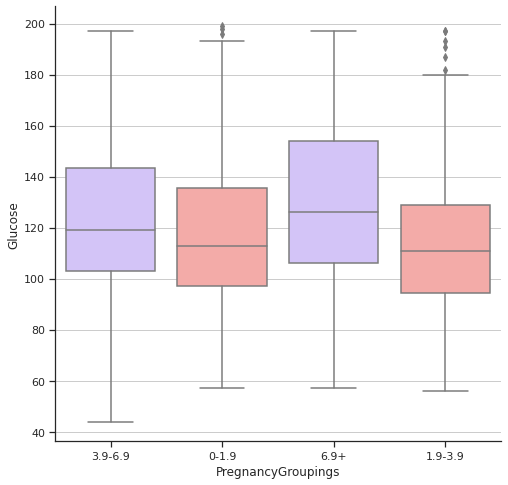

In [67]:
#2. PregnancyGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="PregnancyGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'PregnancyGroupings') #p < 0.05 shows means are statistically different depending on
                                               #categorical level of Pregnancies

#a smaller p-value here shows that there is potentially stronger predictive power for Glucose based on previous
    #number of Pregnancies, instead of vice-versa

             Source            SS   DF          MS          F         p-unc  \
0  GlucoseGroupings   2197.124273    3  732.374758  16.409841  2.419413e-10   
1            Within  34097.485553  764   44.630217        NaN           NaN   

        np2  
0  0.060536  
1       NaN  


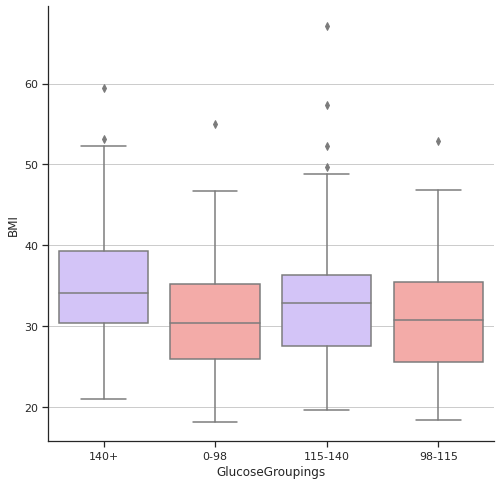

In [68]:
#for the sake of time I will assume that with greater age comes greater number of pregnancies (positive correlation 
    #between age and number of pregnancies) and skip this ANOVA
    #however it would be run the same way, if I were interested in answering that particular research question

#not all of these combinations will be interesting, such as the relationship between Age and BMI, which may have
    #nothing to do with Diabetes status (this will be explored in the two-way ANOVA instead)
    
#3. GlucoseGroupings, BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('BMI', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Glucose

#is this relationship statistically similar the other way around?:

         Source             SS   DF            MS          F         p-unc  \
0  BMIGroupings   36177.914004    3  12059.304668  13.638286  1.128203e-08   
1        Within  675547.396709  764    884.224341        NaN           NaN   

        np2  
0  0.050831  
1       NaN  


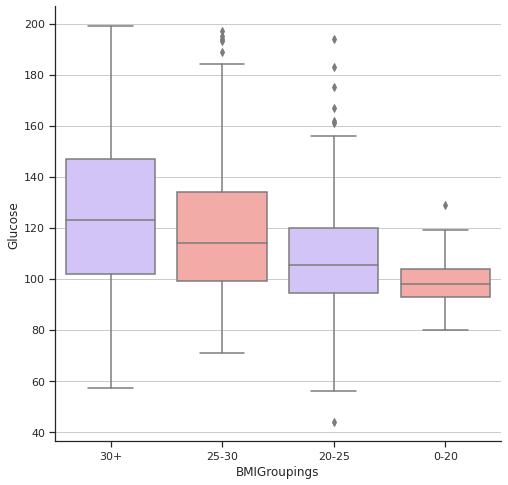

In [69]:
#4. BMIGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="BMIGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'BMIGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of BMI

#a (barely) larger p-value here shows that there is potentially less strong predictive power for Glucose based on 
    #BMI, instead of vice-versa

             Source            SS   DF           MS          F         p-unc  \
0  GlucoseGroupings   8088.465838    3  2696.155279  21.021158  4.301014e-13   
1            Within  97989.970360  764   128.259124        NaN           NaN   

       np2  
0  0.07625  
1      NaN  


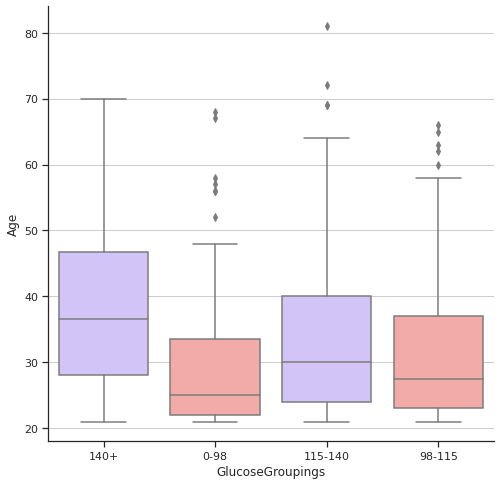

In [70]:
#5. GlucoseGroupings, Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Age', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Glucose (strongest p-value so far)

#is this relationship statistically similar the other way around?:

         Source             SS   DF            MS          F         p-unc  \
0  AgeGroupings   49925.244245    3  16641.748082  19.211687  5.111468e-12   
1        Within  661800.066469  764    866.230453        NaN           NaN   

        np2  
0  0.070147  
1       NaN  


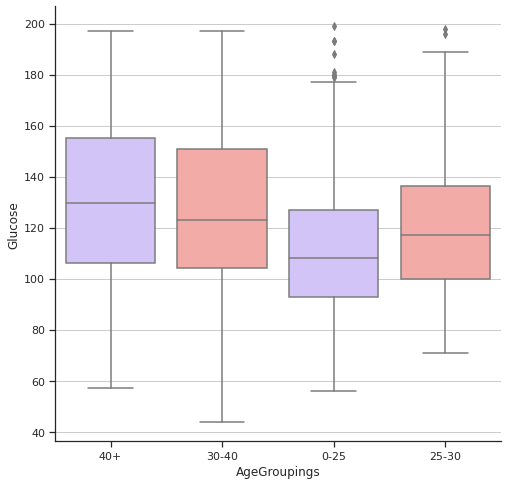

In [71]:
#6. AgeGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="AgeGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'AgeGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Age

#a (barely) larger p-value here shows that there is potentially less strong predictive power for Glucose based on 
    #Age, instead of vice-versa

         Source             SS   DF          MS         F     p-unc       np2
0  BMIGroupings     413.585178    3  137.861726  0.996797  0.393711  0.003899
1        Within  105664.851020  764  138.304779       NaN       NaN       NaN


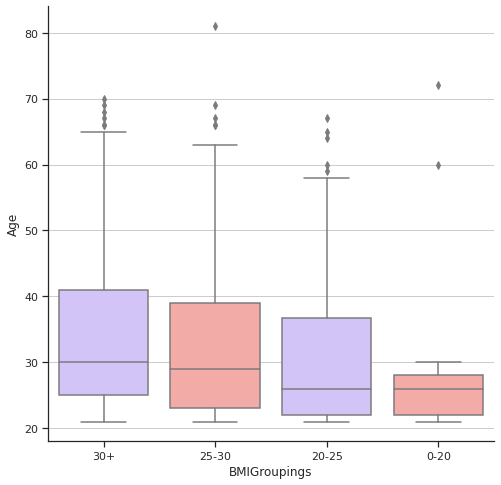

In [72]:
#7. BMIGroupings, Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="BMIGroupings", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Age', 'BMIGroupings') #p > 0.05 shows means are NOT statistically different depending on
                                     #categorical level of BMI

#is this relationship statistically different the other way around?:

         Source            SS   DF          MS         F     p-unc       np2
0  AgeGroupings    697.774466    3  232.591489  4.992014  0.001958  0.019225
1        Within  35596.835359  764   46.592716       NaN       NaN       NaN


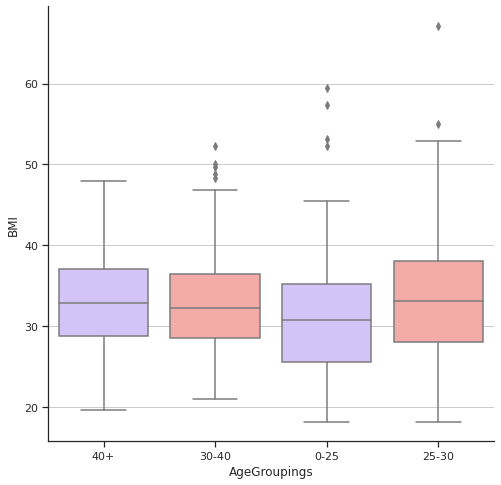

In [73]:
#8. AgeGroupings, BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="AgeGroupings", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('BMI', 'AgeGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Age

#a smaller and significant p-value here shows that there is greater predictive power for BMI based on Age, than
    #vice-versa

In [74]:
#post-hoc tests for one-way ANOVAs:

def tukey_post_hoc(dv, between):
    print(pg.pairwise_tukey(dv=dv, between=between, data = data, effsize = 'cohen')) #using cohen metric

tukey_post_hoc('Pregnancies', 'GlucoseGroupings')#most significant differences between [0-98 and 140+] and 
    #[98-115 and 140+] - evaluated by holistically comparing p-values and cohen effect sizes
tukey_post_hoc('Glucose', 'PregnancyGroupings')#most significant differences between [2-4 and 7+] and [0-2 and 7+]

         A        B   mean(A)   mean(B)      diff        se         T  \
0     0-98  115-140  3.211429  3.847291 -0.635862  0.344831 -1.843981   
1     0-98     140+  3.211429  4.551546 -1.340118  0.348515 -3.845228   
2     0-98   98-115  3.211429  3.709184 -0.497755  0.347670 -1.431687   
3  115-140     140+  3.847291  4.551546 -0.704256  0.335640 -2.098246   
4  115-140   98-115  3.847291  3.709184  0.138107  0.334763  0.412551   
5     140+   98-115  4.551546  3.709184  0.842363  0.338556  2.488102   

    p-tukey     cohen  
0  0.253563 -0.190211  
1  0.000751 -0.400881  
2  0.479886 -0.148898  
3  0.154560 -0.210670  
4  0.976312  0.041313  
5  0.062561  0.251983  
         A        B     mean(A)     mean(B)       diff        se         T  \
0    0-1.9  1.9-3.9  118.723299  116.185393   2.537906  2.961408  0.856993   
1    0-1.9  3.9-6.9  118.723299  123.472223  -4.748924  2.976099 -1.595688   
2    0-1.9     6.9+  118.723299  129.994083 -11.270784  3.006810 -3.748419   
3  1.9-3

In [75]:
#next pair of attributes:

tukey_post_hoc('BMI', 'GlucoseGroupings')#most significant differences between [0-98 and 98-115] and [98-115 and 140+]
tukey_post_hoc('Glucose', 'BMIGroupings')#most significant differences between [20-25 and 30+] and [0-20 and 30+]

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  30.697364  32.876976 -2.179612  0.689118 -3.162903   
1     0-98     140+  30.697364  34.979381 -4.282017  0.696479 -6.148096   
2     0-98   98-115  30.697364  31.055030 -0.357666  0.694791 -0.514781   
3  115-140     140+  32.876976  34.979381 -2.102406  0.670750 -3.134409   
4  115-140   98-115  32.876976  31.055030  1.821946  0.668998  2.723395   
5     140+   98-115  34.979381  31.055030  3.924352  0.676578  5.800294   

        p-tukey     cohen  
0  8.802615e-03 -0.326261  
1  7.571392e-09 -0.640964  
2  9.555632e-01 -0.053538  
3  9.656212e-03 -0.314704  
4  3.337848e-02  0.272723  
5  5.805246e-08  0.587426  
       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-20  20-25   99.642857  108.802488  -9.159631  8.495974 -1.078114   
1   0-20  25-30   99.642857  117.970244 -18.327387  8.250530 -2.221359   
2   0-20    30+   99.642857  126.410258 -26.767401  8.06

In [76]:
#next pair:

tukey_post_hoc('Age', 'GlucoseGroupings')#most significant differences between [0-98 and 140+] and [98-115 and 140+]
tukey_post_hoc('Glucose', 'AgeGroupings')#most significant differences between [0-25 and 40+] and [0-25 and 30-40]

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  29.348571  33.758621 -4.410049  1.168216 -3.775030   
1     0-98     140+  29.348571  38.144330 -8.795758  1.180694 -7.449650   
2     0-98   98-115  29.348571  31.326531 -1.977959  1.177834 -1.679319   
3  115-140     140+  33.758621  38.144330 -4.385709  1.137079 -3.856997   
4  115-140   98-115  33.758621  31.326531  2.432090  1.134108  2.144495   
5     140+   98-115  38.144330  31.326531  6.817799  1.146958  5.944245   

        p-tukey     cohen  
0  9.887096e-04 -0.389403  
1  1.719291e-12 -0.776657  
2  3.353290e-01 -0.174652  
3  7.173435e-04 -0.387254  
4  1.401042e-01  0.214751  
5  2.529809e-08  0.602005  
       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-25  25-30  111.962291  120.326667  -8.364376  3.003195 -2.785159   
1   0-25  30-40  111.962291  127.084838 -15.122547  2.960017 -5.108939   
2   0-25    40+  111.962291  131.795462 -19.833171  2.77

In [77]:
#last pair:

tukey_post_hoc('Age', 'BMIGroupings')#most significant difference between [20-25 and 30+], none were really significant
tukey_post_hoc('BMI', 'AgeGroupings')#most significant differences between [0-25 and 25-30] and [0-25 and 40+]

       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-20  20-25  30.642857  31.816327 -1.173469  3.360087 -0.349238  0.985370   
1   0-20  25-30  30.642857  32.966667 -2.323810  3.263016 -0.712166  0.892285   
2   0-20    30+  30.642857  33.714286 -3.071429  3.188960 -0.963144  0.770440   
3  20-25  25-30  31.816327  32.966667 -1.150340  1.476358 -0.779174  0.863905   
4  20-25    30+  31.816327  33.714286 -1.897959  1.304542 -1.454886  0.465517   
5  25-30    30+  32.966667  33.714286 -0.747619  1.029037 -0.726523  0.886487   

      cohen  
0 -0.099782  
1 -0.197598  
2 -0.261169  
3 -0.097816  
4 -0.161387  
5 -0.063571  
       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-25  25-30  31.167857  33.478443 -2.310586  0.696507 -3.317389  0.005253   
1   0-25  30-40  31.167857  32.886624 -1.718768  0.686494 -2.503691  0.060124   
2   0-25    40+  31.167857  33.051889 -1.884032  0.643951 -2.925737  0.018535   
3  25-30  

In [78]:
#some major takeaways
#1. BMI and Age were not as statistically distinct in their predictive power as other pairs of attributes
#2. Glucose and Age were most predictive of each other
#3. Glucose groupings of [0-98 and 140+] and [98-115 and 140+] were always seen as most distinct from each other
    #when using these groupings to predict other attributes
#4. Age grouping 0-25 was quite distinct from other means, as was 7+ Pregnancies

df       sum_sq     mean_sq          F  \
C(GlucoseGroupings)               3.0    17.142072    5.714024   0.529345   
C(Outcome)                        1.0   275.231051  275.231051  25.497281   
C(GlucoseGroupings):C(Outcome)    3.0    58.780823   19.593608   1.815143   
Residual                        760.0  8203.839284   10.794525        NaN   

                                      PR(>F)  
C(GlucoseGroupings)             6.622456e-01  
C(Outcome)                      5.550295e-07  
C(GlucoseGroupings):C(Outcome)  1.429118e-01  
Residual                                 NaN

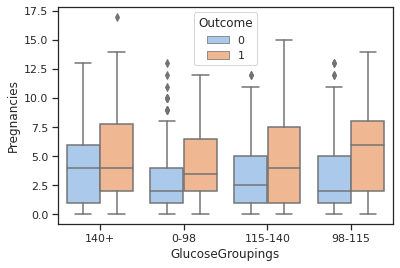

In [79]:
#now the Outcome class will be incorporated into the ANOVA to construct a series of two-way ANOVAs between the 
    #columns previously examined, looking for differing results in order to answer the reseach questions 
    #(see writeup)

#1. Glucose and Outcome to predict Pregnancies:

sns.boxplot(x="GlucoseGroupings", y='Pregnancies', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Pregnancies', 
               anova_model='Pregnancies~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome is predictive of Pregnancies, GlucoseGroupings/interaction term is not

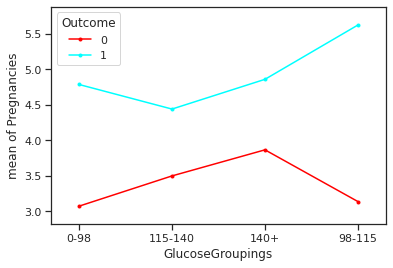

In [80]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['Pregnancies'])
plt.show() #shows that diabetics and non-diabetics have visually distinct trends for number of Pregnancies
#one point to note is that mid-level Glucose (98-115) seems to be very indicative of number of Pregnancies
    #based on diabetic status (far right of image)

In [81]:
res = stat()
res.tukey_hsd(df=data, res_var='Pregnancies', xfac_var = 'Outcome',
              anova_model='Pregnancies~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean number Pregnancies according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Pregnancies', xfac_var = 'GlucoseGroupings',
              anova_model='Pregnancies~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for only the [0-98 and 140+] Glucose groupings
    #this matches the trend/result I saw in the one-way ANOVA

   group1  group2      Diff    Lower     Upper   q-value  p-value
0       1       0  1.567672  1.07939  2.055953  8.913333    0.001
    group1   group2      Diff     Lower     Upper   q-value   p-value
0     140+     0-98  1.340118  0.458193  2.222043  5.533029  0.001000
1     140+  115-140  0.704256 -0.145090  1.553602  3.019237  0.142965
2     140+   98-115  0.842363 -0.014363  1.699088  3.580214  0.055998
3     0-98  115-140  0.635862 -0.236742  1.508466  2.653367  0.239159
4     0-98   98-115  0.497755 -0.382033  1.377543  2.060104  0.465535
5  115-140   98-115  0.138107 -0.709020  0.985234  0.593634  0.900000


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df         sum_sq        mean_sq  \
C(PregnancyGroupings)               3.0    2468.546422     822.848807   
C(Outcome)                          1.0  157763.726700  157763.726700   
C(PregnancyGroupings):C(Outcome)    3.0    3572.167411    1190.722470   
Residual                          760.0  530621.088295     698.185642   

                                           F        PR(>F)  
C(PregnancyGroupings)               1.178553  3.169204e-01  
C(Outcome)                        225.962433  6.631800e-45  
C(PregnancyGroupings):C(Outcome)    1.705453  1.644391e-01  
Residual                                 NaN           NaN

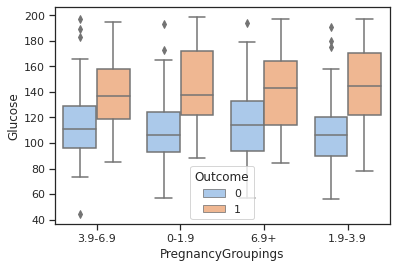

In [82]:
#2. Pregnancies and Outcome to predict Glucose:

sns.boxplot(x="PregnancyGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(PregnancyGroupings) + C(Outcome) + C(PregnancyGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome is predictive of Glucose, PregnancyGroupings/interaction term is not

In [83]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['PregnancyGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #shows that diabetics and non-diabetics have visually distinct trends for Glucose levels

In [84]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model='Glucose~C(Outcome) + C(PregnancyGroupings) + C(Outcome):C(PregnancyGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'PregnancyGroupings',
              anova_model='Glucose~C(PregnancyGroupings) + C(Outcome) + C(PregnancyGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for a couple PregnancyGroupings
    #this matches the trend/result I saw in the one-way ANOVA

   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.748749  35.602623  22.393777    0.001
    group1   group2       Diff     Lower      Upper   q-value   p-value
0  3.9-6.9    0-1.9   4.748924 -1.978928  11.476776  2.570220  0.265972
1  3.9-6.9     6.9+   6.521859 -0.815483  13.859202  3.236563  0.101559
2  3.9-6.9  1.9-3.9   7.286830  0.044467  14.529193  3.663615  0.047962
3    0-1.9     6.9+  11.270784  4.473504  18.068063  6.037686  0.001000
4    0-1.9  1.9-3.9   2.537906 -4.156736   9.232548  1.380383  0.737444
5     6.9+  1.9-3.9  13.808690  6.501786  21.115593  6.881302  0.001000


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df        sum_sq      mean_sq          F  \
C(GlucoseGroupings)               3.0    488.881021   162.960340   3.857582   
C(Outcome)                        1.0   1899.297207  1899.297207  44.959992   
C(GlucoseGroupings):C(Outcome)    3.0     92.624991    30.874997   0.730870   
Residual                        760.0  32105.563355    42.244162        NaN   

                                      PR(>F)  
C(GlucoseGroupings)             9.337712e-03  
C(Outcome)                      3.923243e-11  
C(GlucoseGroupings):C(Outcome)  5.337444e-01  
Residual                                 NaN

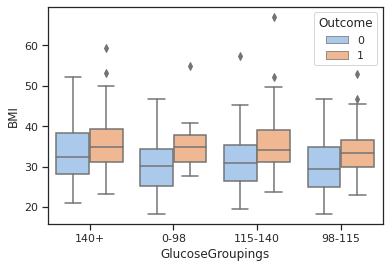

In [85]:
#3. Glucose and Outcome to predict BMI:

sns.boxplot(x="GlucoseGroupings", y='BMI', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='BMI', 
               anova_model='BMI~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome and GlucoseGroupings are predictive of BMI, interaction term is not
#so by adding the Outcome in a two-way ANOVA, that interaction term is not predictive, but GlucoseGroupings is

In [86]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['BMI'])
plt.show() #shows that diabetics and non-diabetics have visually similar trends for BMI over the Glucose range
           #but these levels of BMI are visually distinct. The closest being BMI for those in [98-115] Glucose and
           #diabetic and those [140+] Glucose and non-diabetic.
           #generally, diabetics have higher BMIs, with a dip for those in the [98-115] Glucose range

In [87]:
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'Outcome',
              anova_model='BMI~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean BMI number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'GlucoseGroupings',
              anova_model='BMI~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 1 GlucoseGroupings
    #this matches the trend/result I saw in the one-way ANOVA

   group1  group2      Diff     Lower     Upper    q-value  p-value
0       1       0  4.547093  3.581149  5.513037  13.068846    0.001
    group1   group2      Diff     Lower     Upper   q-value   p-value
0     140+     0-98  4.282017  2.537348  6.026687  8.936898  0.001000
1     140+  115-140  2.102406  0.422185  3.782626  4.556189  0.007256
2     140+   98-115  3.924352  2.229533  5.619171  8.431332  0.001000
3     0-98  115-140  2.179612  0.453382  3.905842  4.597608  0.006580
4     0-98   98-115  0.357666 -1.382777  2.098108  0.748288  0.900000
5  115-140   98-115  1.821946  0.146115  3.497778  3.958739  0.026916


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df        sum_sq       mean_sq             F  \
C(BMIGroupings)               3.0  3.617791e+04  1.205930e+04  1.752394e+01   
C(Outcome)                    1.0 -6.619407e-10 -6.619407e-10 -9.618972e-13   
C(BMIGroupings):C(Outcome)    3.0  1.518565e+05  5.061882e+04  7.355659e+01   
Residual                    761.0  5.236909e+05  6.881616e+02           NaN   

                                  PR(>F)  
C(BMIGroupings)             5.217664e-11  
C(Outcome)                  1.000000e+00  
C(BMIGroupings):C(Outcome)  8.808842e-42  
Residual                             NaN

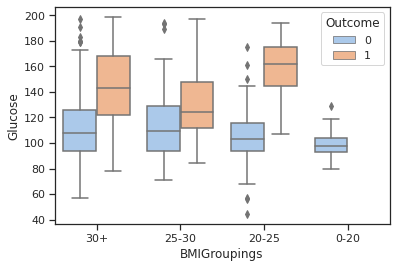

In [88]:
#4. BMI and Outcome to predict Glucose:

sns.boxplot(x="BMIGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
res.anova_summary #p-values show that BMIGroupings and interaction term are predictive of Glucose, Outcome is not
#here the interaction term is VERY STRONG, as well as the BMIGroupings to predict Glucose

In [89]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['BMIGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #TO NOTE: there are no diabetics with a BMI lower than 20!
           #this is important since it signifies that having a BMI < 20 could be indicative of being non-diabetic
                #although this is a small sample size to make such a strong conclusion
           #there is no cross over in this plot, Glucose levels are much more volatile for diabetics, particularly
           #high for those in the 'normal' BMI range

In [90]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model='Glucose~C(Outcome) + C(BMIGroupings) + C(Outcome):C(BMIGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'BMIGroupings',
              anova_model= 'Glucose~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 BMIGroupings combinations
    #this matches the trend/result I saw in the one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.777049  35.574322  22.556287    0.001
  group1 group2       Diff      Lower      Upper   q-value   p-value
0    30+  25-30   8.440015   2.529945  14.350085  5.199970  0.001440
1    30+  20-25  17.607770  10.115389  25.100151  8.557260  0.001000
2    30+   0-20  26.767401   8.452230  45.082573  5.321640  0.001037
3  25-30  20-25   9.167755   0.688581  17.646929  3.936948  0.028134
4  25-30   0-20  18.327387  -0.413108  37.067881  3.560982  0.058008
5  20-25   0-20   9.159631 -10.138373  28.457636  1.728287  0.599452


In [91]:
#5. Glucose and Outcome to predict Age:

sns.boxplot(x="GlucoseGroupings", y='Age', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Age', 
               anova_model='Age~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that GlucoseGroupings and Outcome are separately predictive of Age, not interaction
#each column/variable is predictive, but not the interaction term, gain nothing by adding this term

df        sum_sq      mean_sq          F  \
C(GlucoseGroupings)               3.0   3683.977146  1227.992382   9.746602   
C(Outcome)                        1.0   1622.206461  1622.206461  12.875487   
C(GlucoseGroupings):C(Outcome)    3.0    613.955979   204.651993   1.624327   
Residual                        760.0  95753.807920   125.991853        NaN   

                                  PR(>F)  
C(GlucoseGroupings)             0.000003  
C(Outcome)                      0.000354  
C(GlucoseGroupings):C(Outcome)  0.182293  
Residual                             NaN

In [92]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['Age'])
plt.show() #these trends are closer than any other interaction plots, there is cross over between the lines and
           #mean Age for those in the [115-140] and [140+] groups are similar across diabetics and non-diabetics
           #I would not have guessed this interaction plot trend based on one-way ANOVA results
           #accounting for Outcome has a substantial effect here

In [93]:
res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'Outcome',
              anova_model='Age~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean Age according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'GlucoseGroupings',
              anova_model= 'Age~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 GlucoseGroupings
    #this matches the trend/result I see in the interaction plot

   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  5.877164  4.208996  7.545332  9.781003    0.001
    group1   group2      Diff     Lower      Upper    q-value   p-value
0     140+     0-98  8.795758  5.782745  11.808772  10.629768  0.001000
1     140+  115-140  4.385709  1.483998   7.287420   5.503478  0.001000
2     140+   98-115  6.817799  3.890877   9.744721   8.481733  0.001000
3     0-98  115-140  4.410049  1.428880   7.391218   5.386521  0.001000
4     0-98   98-115  1.977959 -1.027755   4.983673   2.396190  0.327398
5  115-140   98-115  2.432090 -0.462041   5.326221   3.059941  0.134278


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df         sum_sq        mean_sq           F  \
C(AgeGroupings)               3.0    9311.800495    3103.933498    4.497895   
C(Outcome)                    1.0  134450.064835  134450.064835  194.830929   
C(AgeGroupings):C(Outcome)    3.0    2884.764750     961.588250    1.393433   
Residual                    760.0  524465.236884     690.085838         NaN   

                                  PR(>F)  
C(AgeGroupings)             3.875524e-03  
C(Outcome)                  1.384945e-39  
C(AgeGroupings):C(Outcome)  2.435223e-01  
Residual                             NaN

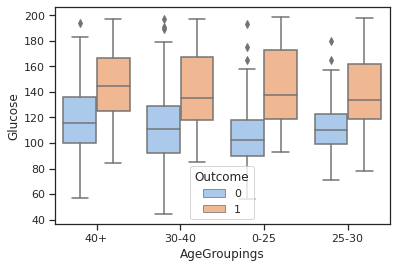

In [94]:
#6. Age and Outcome to predict Glucose:

sns.boxplot(x="AgeGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
res.anova_summary #p-values show that AgeGroupings and Outcome are separately predictive of Glucose, not interaction
#each column/variable is predictive, but not the interaction term, gain nothing by adding this term

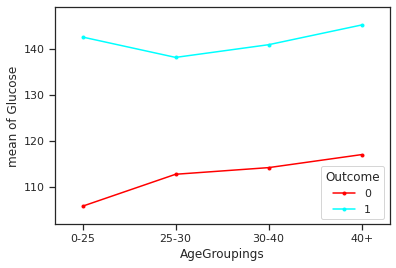

In [95]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['AgeGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #these trends are significantly different, Diabetes class seems a good predictor of Glucose
           #this confirms the trend I saw in the t-test AND one-way ANOVA
           #Glucose is most strongly predicted by Diabetes class

In [96]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model= 'Glucose~C(Outcome) + C(AgeGroupings) + C(Outcome):C(AgeGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose according to Outcome (good, this confirms)

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'AgeGroupings',
              anova_model= 'Glucose~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 AgeGroupings

   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.771594  35.579778  22.524816    0.001
  group1 group2       Diff      Lower      Upper    q-value   p-value
0    40+  30-40   4.710624  -2.550284  11.971532   2.362321  0.340402
1    40+   0-25  19.833171  13.452270  26.214072  11.317790  0.001000
2    40+  25-30  11.468795   4.114843  18.822747   5.678694  0.001000
3  30-40   0-25  15.122547   8.320094  21.925000   8.094889  0.001000
4  30-40  25-30   6.758171  -0.964398  14.480740   3.186537  0.110236
5   0-25  25-30   8.364376   1.462696  15.266056   4.412962  0.010106


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df        sum_sq       mean_sq             F  \
C(BMIGroupings)               3.0  4.135852e+02  1.378617e+02  1.053353e+00   
C(Outcome)                    1.0 -4.904038e-12 -4.904038e-12 -3.747003e-14   
C(BMIGroupings):C(Outcome)    3.0  6.065974e+03  2.021991e+03  1.544932e+01   
Residual                    761.0  9.959888e+04  1.308789e+02           NaN   

                                  PR(>F)  
C(BMIGroupings)             3.682533e-01  
C(Outcome)                  1.000000e+00  
C(BMIGroupings):C(Outcome)  9.159029e-10  
Residual                             NaN

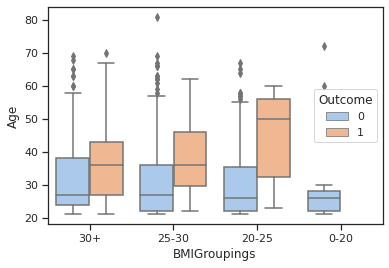

In [97]:
#7. BMI and Outcome to predict Age:
#this will be interesting since this was the ONLY non-significant one-way ANOVA

sns.boxplot(x="BMIGroupings", y='Age', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Age', 
               anova_model='Age~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
res.anova_summary #p-values show that only the interaction term is predictive of Age, not BMIGroupings OR Outcome
                  #I haven't seen this result yet, good to note

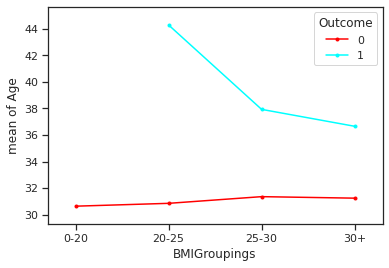

In [98]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['BMIGroupings'], trace=data['Outcome'], response=data['Age'])
plt.show() #these trends are VERY similar to Glucose prediction based on BMI
           #key to note that there are no diabetics below 20 BMI, as I saw previously in an interaction plot

In [99]:
res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'Outcome',
              anova_model= 'Age~C(Outcome) + C(BMIGroupings) + C(Outcome):C(BMIGroupings)')
print(res.tukey_summary) #statistical difference in mean Age according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'BMIGroupings',
              anova_model= 'Age~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
print(res.tukey_summary) #NO statistical differences for ANY BMIGroupings
                         #interesting to note, AND confirms response from one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  5.877164  4.176955  7.577374  9.596651    0.001
  group1 group2      Diff     Lower      Upper   q-value   p-value
0    30+  25-30  0.747619 -1.829784   3.325022  1.056205  0.866027
1    30+  20-25  1.897959 -1.369495   5.165414  2.115084  0.442096
2    30+   0-20  3.071429 -4.915884  11.058741  1.400200  0.729585
3  25-30  20-25  1.150340 -2.547458   4.848139  1.132748  0.835668
4  25-30   0-20  2.323810 -5.848988  10.496607  1.035333  0.874304
5  20-25   0-20  1.173469 -7.242460   9.589399  0.507715  0.900000


In [100]:
#8. Age and Outcome to predict BMI:

sns.boxplot(x="AgeGroupings", y='BMI', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='BMI', 
               anova_model='BMI~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome and the interaction term are predictive of BMI, not AgeGroupings
                  #goes hand-in-hand with result from previous two-way ANOVA

df        sum_sq      mean_sq          F  \
C(AgeGroupings)               3.0    304.615025   101.538342   2.411409   
C(Outcome)                    1.0   3214.381017  3214.381017  76.337529   
C(AgeGroupings):C(Outcome)    3.0    380.769128   126.923043   3.014264   
Residual                    760.0  32001.685214    42.107481        NaN   

                                  PR(>F)  
C(AgeGroupings)             6.565046e-02  
C(Outcome)                  1.513124e-17  
C(AgeGroupings):C(Outcome)  2.935316e-02  
Residual                             NaN

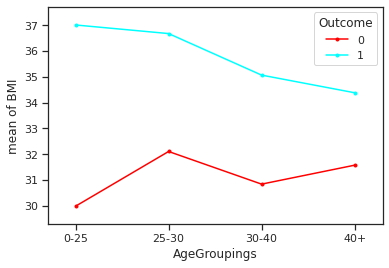

In [101]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['AgeGroupings'], trace=data['Outcome'], response=data['BMI'])
plt.show() #these trends are distinct for Diabetes class, no cross over, distinct trends for each class

In [102]:
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'Outcome',
              anova_model= 'BMI~C(Outcome) + C(AgeGroupings) + C(Outcome):C(AgeGroupings)')
print(res.tukey_summary) #statistical difference in mean BMI according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'AgeGroupings',
              anova_model= 'BMI~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
print(res.tukey_summary) #p-values suggest distinct means between all AgeGroupings except [0-20] and [0-25]
                         #comparing this to the blue line above for these groups, this makes sense visually

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  4.547093  3.582713  5.511473  13.09004    0.001
  group1 group2      Diff     Lower     Upper   q-value   p-value
0    40+  30-40  0.165265 -1.628308  1.958837  0.335515  0.900000
1    40+   0-25  1.884032  0.307837  3.460228  4.352409  0.011586
2    40+  25-30  0.426554 -1.390002  2.243110  0.855021  0.900000
3  30-40   0-25  1.718768  0.038441  3.399094  3.724561  0.042745
4  30-40  25-30  0.591819 -1.315793  2.499430  1.129667  0.836890
5   0-25  25-30  2.310586  0.605749  4.015424  4.935041  0.002874


# Final Submission begins here:

In [103]:
#with one-factor/one-way ANCOVA I have the most simple model of the form: y = beta0 +beta1x2 +beta2x2 + e
    #where x1 is a categorical variable and x2 is a continuous variable
#I interpret this to mean when x1 is increased by 1, y increases by beta1*x1

#a more indepth ANCOVA can be written with the equation: y = beta0 + beta1x1 + beta2x2 + beta3(|x1 - x2|) + e
    #assume x1 is categorical, x2 is continuous, examining effect of x1 on y if I adjust for bias of x2
        #not a joint effect of x1/2 on y (two-way ANOVA), here I am adjusting for bias of x2
        #"centering categorical variable"

#there are several assumptions to the ANCOVA, alongside those previously examined for the ANOVA
    #1. the relationship between the dependent variable and covariate is linear (examined by visualizations)
    #2. the regression lines for each group of categorical variable are assumed to be of equal slope (magnitude&sign)
        #this is tested by conducting a two-way ANOVA and examining the interaction between the independent variable
            #and covariate. if the interaction term p-value is < 0.05, this assumption is not held

#assumptions from the ANOVA that carry over include:
    #1. cases represent the population, and are randomly sampled (I will not test this here)
    #2. dependent variable is approximately normally distributed (previously tested by the Shapiro-Wilk test)
    #3. variances of dependent variable are assumed to have equal variances (previously tested by Levene's test)

In [104]:
#research question 1:
    #what is the extent of the effect of Outcome class (categorical) on Glucose level (numeric) when accounting for 
        #Insulin (covariate, numeric) being constant?
    #since Insulin has 379 '0' values, does removing the weight of this variable change the overall relationship 
        #between Glucose and Outcome?

In [105]:
data = pd.read_csv('diabetes.csv')
data1 = data

In [106]:
!pip install dfply
from dfply import *

data1 >> group_by(X.Outcome) >> summarize(n=X['Glucose'].count(), mean=X['Glucose'].mean(), sd=X['Glucose'].std())

  Using cached dfply-0.3.3-py3-none-any.whl (612 kB)


Outcome    n        mean         sd
0        0  500  109.980000  26.141200
1        1  268  141.257463  31.939622

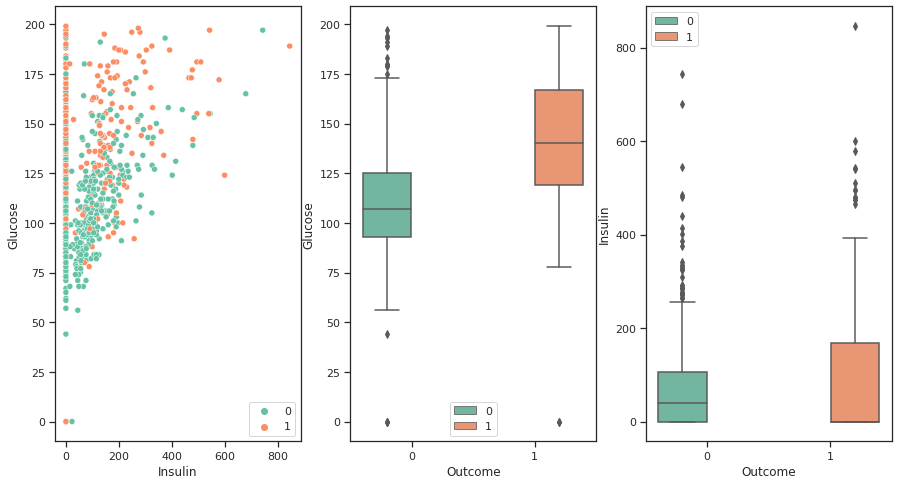

In [107]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="Insulin", y="Glucose", hue=data1.Outcome.tolist(), ax=axs[0], palette = 'Set2')
sns.boxplot(data=data1, x="Outcome", y="Glucose", hue=data1.Outcome.tolist(), ax=axs[1], palette = 'Set2')
sns.boxplot(data=data1, x="Outcome", y="Insulin", hue=data1.Outcome.tolist(), ax=axs[2], palette = 'Set2')
plt.show()
#this plot shows there are indeed many Insulin values of '0'
#splitting by Outcome (diabetic = orange) I can see Glucose levels are usually higher for diabetics
    #this trend is less prominent for Insulin
#if the '0' values were not present in such large nunber, the relationship between Insulin and Glucose could be 
    #approximately linear

In [108]:
from pingouin import ancova
ancova(data=data1, dv='Glucose', covar='Insulin', between='Outcome')
#takeaway: both Outcome and Insulin independently have relationship on Glucose
#can reject the null hypothesis that Outcome leads to the same average Glucose, ACCOUNTING for Insulin level
    #Outcome has predictive power for Glucose, even with all Insulin levels are constant
#Insulin is significant in predicting Glucose

#here the p-value for Outcome is E-40, which is smaller than the original t-test for Outcome on Glucose at E-48
    #this may suggest that keeping Insulin constant means Outcome class leads to SLIGHTLY less distinct Glucose means

Source             SS   DF           F         p-unc       np2
0   Outcome  142942.609757    1  197.017109  5.435191e-40  0.204796
1   Insulin   58341.531911    1   80.411852  2.303955e-18  0.095116
2  Residual  555033.503164  765         NaN           NaN       NaN

In [109]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='Glucose', between='Outcome', data = data1, effsize = 'cohen'))
#shows the difference in means of Glucose based on Outcome, cohen is large, negative relationship
    #statistically reassures me that mean Glucose of diabetics is higher than of non-diabetics

   A  B  mean(A)     mean(B)       diff        se         T  p-tukey     cohen
0  0  1   109.98  141.257463 -31.277463  2.142283 -14.60006      0.0 -1.105307


In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(data1['Glucose'], data1['Outcome'], alpha = 0.05))
#shows the confidence interval for the difference in mean, reject the null hypothesis that means are identical

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0      1  31.2775  -0.0 27.072 35.4829   True
--------------------------------------------------


In [111]:
posthoc = pg.pairwise_ttests(data=data1, dv='Glucose', between='Outcome',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc

Contrast  A  B  Paired  Parametric          T         dof alternative  \
0  Outcome  0  1   False        True -13.751537  461.331656   two-sided   

          p-unc       BF10    hedges  
0  2.644161e-36  1.519e+35 -1.104224

In [112]:
#now to look at a more complex research question 2:
    #from the one-way and two-way ANOVAs it was seen that BMIGroupings did not see significant means on Age
    #does this result change when accounting for a covariate?
    #try covariate = Age since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings

In [113]:
data1 = datafinal.copy()

data1 >> group_by(X.BMIGroupings) >> summarize(n=X['Glucose'].count(), mean=X['Glucose'].mean(), sd=X['Glucose'].std())
#standard deviation and mean increase with BMIGroupings, generally speaking

BMIGroupings    n        mean         sd
0         0-20   14   99.642857  12.743669
1        20-25   98  108.802488  26.375535
2        25-30  180  117.970244  26.949151
3          30+  476  126.410258  31.654595

In [114]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="Age", y="Glucose", hue=data1.BMIGroupings.tolist(), ax=axs[0], palette = 'cool')
sns.boxplot(data=data1, x="BMIGroupings", y="Glucose", hue=data1.BMIGroupings.tolist(), ax=axs[1], palette = 'cool')
sns.boxplot(data=data1, x="BMIGroupings", y="Age", hue=data1.BMIGroupings.tolist(), ax=axs[2], palette = 'cool')
plt.show()
#this plot shows the distribution of the AgeGroupings based on Glucose value
#visually, as BMIGroupings decreases the Glucose also decreases (with those 0-20 yo having the smallest distribution)
#simiarly, as BMIGroupings decreases Age also seems to decreases

In [115]:
ancova(data=data1, dv='Glucose', covar='Age', between='BMIGroupings')
#takeaway: both BMIGroupings and Age independently have relationship on Glucose
#BMIGroupings leads to at least one different mean in Glucose, accounting for Age

Source             SS   DF          F         p-unc       np2
0  BMIGroupings   31143.800538    3  12.587924  4.871221e-08  0.047160
1           Age   46300.960896    1  56.142762  1.868928e-13  0.068538
2      Residual  629246.435814  763        NaN           NaN       NaN

In [116]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='Glucose', between='BMIGroupings', data = data1, effsize = 'cohen'))
#shows the difference in means of Glucose based on BMI group, cohen values are all negative
#largest difference in mean is seen between the two furthest BMI groups [0-20, 30+], supported by cohen and p-value

       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-20  20-25   99.642857  108.802488  -9.159631  8.495974 -1.078114   
1   0-20  25-30   99.642857  117.970244 -18.327387  8.250530 -2.221359   
2   0-20    30+   99.642857  126.410258 -26.767401  8.063281 -3.319666   
3  20-25  25-30  108.802488  117.970244  -9.167755  3.732969 -2.455889   
4  20-25    30+  108.802488  126.410258 -17.607770  3.298532 -5.338063   
5  25-30    30+  117.970244  126.410258  -8.440015  2.601917 -3.243768   

        p-tukey     cohen  
0  7.030245e-01 -0.308033  
1  1.183588e-01 -0.616339  
2  5.211971e-03 -0.900171  
3  6.785677e-02 -0.308306  
4  7.410042e-07 -0.592138  
5  6.738502e-03 -0.283832  


In [117]:
print(pairwise_tukeyhsd(data1['Glucose'], data1['BMIGroupings'], alpha = 0.05))
#shows the confidence intervals for the differences in mean, reject some null hypotheses that means are identical

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  0-20  20-25   9.1596  0.703 -12.7149 31.0342  False
  0-20  25-30  18.3274 0.1184  -2.9152   39.57  False
  0-20    30+  26.7674 0.0052   6.0069 47.5279   True
 20-25  25-30   9.1678 0.0679  -0.4435  18.779  False
 20-25    30+  17.6078    0.0   9.1151 26.1005   True
 25-30    30+     8.44 0.0067   1.7409 15.1392   True
-----------------------------------------------------


In [118]:
posthoc = pg.pairwise_ttests(data=data1, dv='Glucose', between='BMIGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc

Contrast      A      B  Paired  Parametric         T         dof  \
0  BMIGroupings   0-20  20-25   False        True -2.118224   32.164663   
1  BMIGroupings   0-20  25-30   False        True -4.635044   23.410415   
2  BMIGroupings   0-20    30+   False        True -7.230433   18.129998   
3  BMIGroupings  20-25  25-30   False        True -2.747570  203.055103   
4  BMIGroupings  20-25    30+   False        True -5.803933  160.183145   
5  BMIGroupings  25-30    30+   False        True -3.406160  375.941920   

  alternative         p-unc        p-corr p-adjust       BF10    hedges  
0   two-sided  4.197494e-02  4.197494e-02   fdr_bh       1.77 -0.361676  
1   two-sided  1.110651e-04  2.221303e-04   fdr_bh   2187.385 -0.695952  
2   two-sided  9.611930e-07  2.883579e-06   fdr_bh  2.362e+09 -0.853892  
3   two-sided  6.544113e-03  7.852935e-03   fdr_bh      4.769 -0.341801  
4   two-sided  3.374329e-08  2.024597e-07   fdr_bh  9.111e+05 -0.570503  
5   two-sided  7.299662e-04  1.094949e-03   fdr_bh     26.433 -0.276957

In [119]:
#research question 3:
    #try covariate = Glucose since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings

In [120]:
data1 = datafinal.copy()

data1 >> group_by(X.AgeGroupings) >> summarize(n=X['BMI'].count(), mean=X['BMI'].mean(), sd=X['BMI'].std())
#standard deviation and mean generally standard across each of these AgeGroupings for BMI 

AgeGroupings    n       mean        sd
0         0-25  267  31.167857  6.940720
1        25-30  150  33.478443  7.814007
2        30-40  157  32.886624  6.389616
3          40+  194  33.051889  6.156790

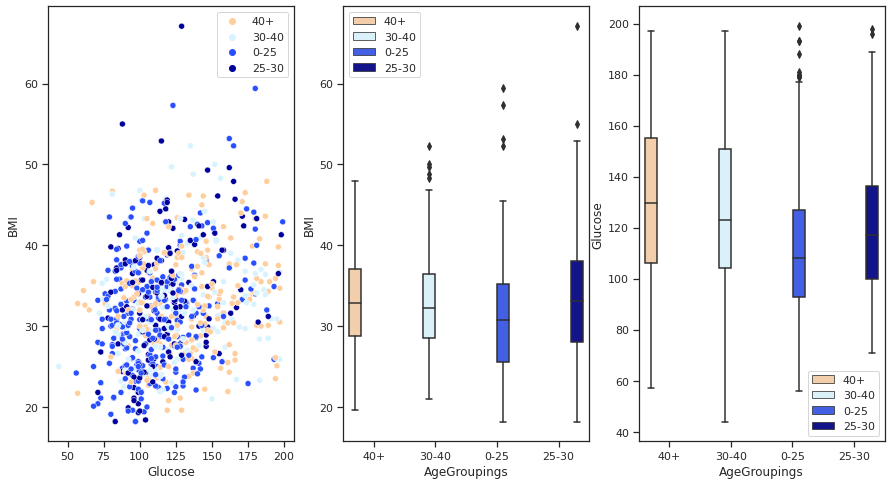

In [121]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="Glucose", y="BMI", hue=data1.AgeGroupings.tolist(), ax=axs[0], palette = 'flag')
sns.boxplot(data=data1, x="AgeGroupings", y="BMI", hue=data1.AgeGroupings.tolist(), ax=axs[1], palette = 'flag')
sns.boxplot(data=data1, x="AgeGroupings", y="Glucose", hue=data1.AgeGroupings.tolist(), ax=axs[2], palette = 'flag')
plt.show()
#A: AgeGroupings see mixed BMI, no clear linear trend
#B: BMIs seem to have similar distributions, with [0-25] having the lowest BMI
#C: as AgeGrouping increases, median Glucose seems to increase

In [122]:
ancova(data=data1, dv='BMI', covar='Glucose', between='AgeGroupings')
#takeaway: AgeGroupings does NOT lead to 1+ different mean(s) for BMI, Glucose does
#AgeGroupings do NOT lead to at least one different mean in Glucose, accounting for Age being constant

Source            SS   DF          F         p-unc       np2
0  AgeGroupings    348.679835    3   2.613085  5.023283e-02  0.010170
1       Glucose   1659.591017    1  37.312044  1.603199e-09  0.046622
2      Residual  33937.244343  763        NaN           NaN       NaN

In [123]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='BMI', between='AgeGroupings', data = data1, effsize = 'cohen'))
#shows the difference in means of BMI are generally small, largest is between [0-25] and [25-30], supported by cohen 
    #and p-value, although these differences are not as statistically distinct as other Groupings

       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-25  25-30  31.167857  33.478443 -2.310586  0.696507 -3.317389  0.005253   
1   0-25  30-40  31.167857  32.886624 -1.718768  0.686494 -2.503691  0.060124   
2   0-25    40+  31.167857  33.051889 -1.884032  0.643951 -2.925737  0.018535   
3  25-30  30-40  33.478443  32.886624  0.591819  0.779350  0.759374  0.872636   
4  25-30    40+  33.478443  33.051889  0.426554  0.742150  0.574754  0.939619   
5  30-40    40+  32.886624  33.051889 -0.165265  0.732760 -0.225537  0.995953   

      cohen  
0 -0.338504  
1 -0.251801  
2 -0.276013  
3  0.086702  
4  0.062491  
5 -0.024211  


In [124]:
print(pairwise_tukeyhsd(data1['BMI'], data1['AgeGroupings'], alpha = 0.05))
#shows the confidence intervals for the differences in mean, reject some null hypotheses that means are identical

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  0-25  25-30   2.3106 0.0053  0.5173 4.1039   True
  0-25  30-40   1.7188 0.0601 -0.0487 3.4863  False
  0-25    40+    1.884 0.0185  0.2261  3.542   True
 25-30  30-40  -0.5918 0.8726 -2.5984 1.4148  False
 25-30    40+  -0.4266 0.9396 -2.3374 1.4843  False
 30-40    40+   0.1653  0.996 -1.7214 2.0519  False
---------------------------------------------------


In [125]:
posthoc = pg.pairwise_ttests(data=data1, dv='BMI', between='AgeGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc

Contrast      A      B  Paired  Parametric         T         dof  \
0  AgeGroupings   0-25  25-30   False        True -3.014563  279.590628   
1  AgeGroupings   0-25  30-40   False        True -2.589753  349.031173   
2  AgeGroupings   0-25    40+   False        True -3.073264  441.102762   
3  AgeGroupings  25-30  30-40   False        True  0.724589  287.942816   
4  AgeGroupings  25-30    40+   False        True  0.549558  277.085812   
5  AgeGroupings  30-40    40+   False        True -0.244887  328.566016   

  alternative     p-unc    p-corr p-adjust   BF10    hedges  
0   two-sided  0.002810  0.008429   fdr_bh  8.704 -0.317410  
1   two-sided  0.010007  0.020013   fdr_bh  2.779 -0.254472  
2   two-sided  0.002249  0.008429   fdr_bh    9.8 -0.284028  
3   two-sided  0.469292  0.699678   fdr_bh  0.162  0.082903  
4   two-sided  0.583065  0.699678   fdr_bh  0.139  0.061437  
5   two-sided  0.806697  0.806697   fdr_bh  0.122 -0.026335

In [126]:
#research question 4:
    #try covariate = BMI since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings

In [127]:
data1 = datafinal.copy()

data1 >> group_by(X.GlucoseGroupings) >> summarize(n=X['Age'].count(), mean=X['Age'].mean(), sd=X['Age'].std())
#generally, mean and standard deviation increase as Age increases

GlucoseGroupings    n       mean         sd
0             0-98  175  29.348571   9.520618
1          115-140  203  33.758621  12.103345
2             140+  194  38.144330  12.571445
3           98-115  196  31.326531  10.651857

In [128]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="BMI", y="Age", hue=data1.GlucoseGroupings.tolist(), ax=axs[0], palette='magma')
sns.boxplot(data=data1, x="GlucoseGroupings", y="Age", hue=data1.GlucoseGroupings.tolist(), ax=axs[1], palette='magma')
sns.boxplot(data=data1, x="GlucoseGroupings", y="BMI", hue=data1.GlucoseGroupings.tolist(), ax=axs[2], palette='magma')
plt.show()
#A: GlucoseGroupings see mixed Age, no clear linear trend
#B: as GlucoseGrouping increases, mean Age seems to increase as well
#C: as GlucoseGrouping increases, mean BMI seems to increase as well, wider IQRs here

In [129]:
ancova(data=data1, dv='Age', covar='BMI', between='GlucoseGroupings')
#takeaway: GlucoseGroupings lead to at least one distinct mean Age, accounting for BMI

Source            SS   DF          F         p-unc       np2
0  GlucoseGroupings   8184.839851    3  21.282236  3.017110e-13  0.077217
1               BMI    177.051781    1   1.381111  2.402786e-01  0.001807
2          Residual  97812.918579  763        NaN           NaN       NaN

In [130]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='Age', between='GlucoseGroupings', data = data1, effsize = 'cohen'))
#shows the difference in means of Age, largest is between [0-98] and [140+], supported by visual figures,
    #supported by cohen and p-value

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  29.348571  33.758621 -4.410049  1.168216 -3.775030   
1     0-98     140+  29.348571  38.144330 -8.795758  1.180694 -7.449650   
2     0-98   98-115  29.348571  31.326531 -1.977959  1.177834 -1.679319   
3  115-140     140+  33.758621  38.144330 -4.385709  1.137079 -3.856997   
4  115-140   98-115  33.758621  31.326531  2.432090  1.134108  2.144495   
5     140+   98-115  38.144330  31.326531  6.817799  1.146958  5.944245   

        p-tukey     cohen  
0  9.887096e-04 -0.389403  
1  1.719291e-12 -0.776657  
2  3.353290e-01 -0.174652  
3  7.173435e-04 -0.387254  
4  1.401042e-01  0.214751  
5  2.529809e-08  0.602005  


In [131]:
print(pairwise_tukeyhsd(data1['Age'], data1['GlucoseGroupings'], alpha = 0.05))
#shows the confidence interval for the difference in mean, reject most null hypotheses that means are identical

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   0-98 115-140     4.41  0.001  1.4023  7.4178   True
   0-98    140+   8.7958    0.0  5.7558 11.8357   True
   0-98  98-115    1.978 0.3353 -1.0546  5.0105  False
115-140    140+   4.3857 0.0007  1.4581  7.3133   True
115-140  98-115  -2.4321 0.1401 -5.3521  0.4879  False
   140+  98-115  -6.8178    0.0 -9.7709 -3.8647   True
------------------------------------------------------


In [132]:
posthoc = pg.pairwise_ttests(data=data1, dv='Age', between='GlucoseGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc

Contrast        A        B  Paired  Parametric         T  \
0  GlucoseGroupings     0-98  115-140   False        True -3.961003   
1  GlucoseGroupings     0-98     140+   False        True -7.619444   
2  GlucoseGroupings     0-98   98-115   False        True -1.888622   
3  GlucoseGroupings  115-140     140+   False        True -3.538386   
4  GlucoseGroupings  115-140   98-115   False        True  2.132659   
5  GlucoseGroupings     140+   98-115   False        True  5.775445   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  372.972804   two-sided  8.941552e-05  1.788310e-04   fdr_bh    193.667   
1  356.561777   two-sided  2.320587e-13  1.392352e-12   fdr_bh  2.862e+10   
2  368.999318   two-sided  5.972658e-02  5.972658e-02   fdr_bh      0.637   
3  392.274626   two-sided  4.508112e-04  6.762167e-04   fdr_bh     43.458   
4  393.657928   two-sided  3.357090e-02  4.028508e-02   fdr_bh      0.987   
5  376.555266   two-sided  1.608083e-08  4.824248e-08   fdr_bh  6.324e+05   

     hedges  
0 -0.400700  
1 -0.781718  
2 -0.194780  
3 -0.354895  
4  0.212686  
5  0.584271

In [133]:
#research question 5:
    #try covariate = Glucose since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings
    #now alternating Groupings and dependent variable from combinations already seen

In [134]:
data1 = datafinal.copy()

data1 >> group_by(X.BMIGroupings) >> summarize(n=X['Age'].count(), mean=X['Age'].mean(), sd=X['Age'].std())
#generally, mean increases while standard deviation decreases across increasing BMI

BMIGroupings    n       mean         sd
0         0-20   14  30.642857  15.455182
1        20-25   98  31.816327  12.943451
2        25-30  180  32.966667  12.602607
3          30+  476  33.714286  11.038606

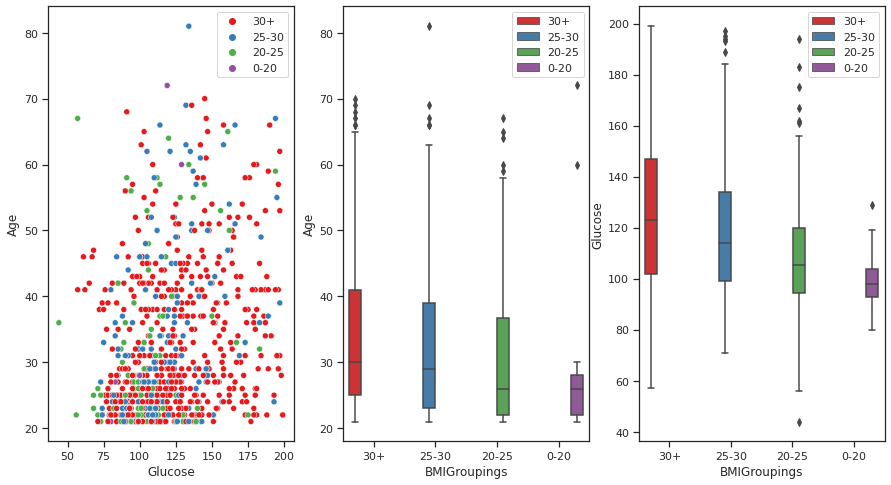

In [135]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="Glucose", y="Age", hue=data1.BMIGroupings.tolist(), ax=axs[0], palette = 'Set1')
sns.boxplot(data=data1, x="BMIGroupings", y="Age", hue=data1.BMIGroupings.tolist(), ax=axs[1], palette = 'Set1')
sns.boxplot(data=data1, x="BMIGroupings", y="Glucose", hue=data1.BMIGroupings.tolist(), ax=axs[2], palette = 'Set1')
plt.show()
#A: no clear linear trend
#B: as BMIGrouping increases, mean Age seems to increase as well
#C: as BMIGrouping increases, mean Glucose seems to increase as well

In [136]:
ancova(data=data1, dv='Age', covar='Glucose', between='BMIGroupings')
#takeaway: BMIGroupings do NOT lead to distinct means for Age when accounting for Glucose

Source            SS   DF          F         p-unc       np2
0  BMIGroupings      4.500275    3   0.011629  9.982833e-01  0.000046
1       Glucose   7242.103454    1  56.142762  1.868928e-13  0.068538
2      Residual  98422.747566  763        NaN           NaN       NaN

In [137]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='Age', between='BMIGroupings', data = data1, effsize = 'cohen'))
#shows the difference in means of Age, largest is between [0-20] and [30+], supported by visual figures,
    #supported by cohen and p-value
#ALL P-VALUES FAIL HERE, cohen values are small as well

       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-20  20-25  30.642857  31.816327 -1.173469  3.360087 -0.349238  0.985370   
1   0-20  25-30  30.642857  32.966667 -2.323810  3.263016 -0.712166  0.892285   
2   0-20    30+  30.642857  33.714286 -3.071429  3.188960 -0.963144  0.770440   
3  20-25  25-30  31.816327  32.966667 -1.150340  1.476358 -0.779174  0.863905   
4  20-25    30+  31.816327  33.714286 -1.897959  1.304542 -1.454886  0.465517   
5  25-30    30+  32.966667  33.714286 -0.747619  1.029037 -0.726523  0.886487   

      cohen  
0 -0.099782  
1 -0.197598  
2 -0.261169  
3 -0.097816  
4 -0.161387  
5 -0.063571  


In [138]:
print(pairwise_tukeyhsd(data1['Age'], data1['BMIGroupings'], alpha = 0.05))
#shows the confidence intervals for the differences in mean, fail to reject all null hypotheses that means are 
    #identical

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-20  20-25   1.1735 0.9854 -7.4777  9.8247  False
  0-20  25-30   2.3238 0.8923 -6.0775 10.7251  False
  0-20    30+   3.0714 0.7704 -5.1392  11.282  False
 20-25  25-30   1.1503 0.8639 -2.6508  4.9515  False
 20-25    30+    1.898 0.4655 -1.4608  5.2568  False
 25-30    30+   0.7476 0.8865 -1.9018  3.3971  False
----------------------------------------------------


In [139]:
posthoc = pg.pairwise_ttests(data=data1, dv='Age', between='BMIGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc
#supports the results of the previous cell, none of the p-values are less than 0.05

Contrast      A      B  Paired  Parametric         T         dof  \
0  BMIGroupings   0-20  20-25   False        True -0.270849   15.714486   
1  BMIGroupings   0-20  25-30   False        True -0.548581   14.376603   
2  BMIGroupings   0-20    30+   False        True -0.738068   13.392943   
3  BMIGroupings  20-25  25-30   False        True -0.714527  194.845178   
4  BMIGroupings  20-25    30+   False        True -1.353784  127.640769   
5  BMIGroupings  25-30    30+   False        True -0.700715  288.768789   

  alternative     p-unc    p-corr p-adjust   BF10    hedges  
0   two-sided  0.790033  0.790033   fdr_bh  0.294 -0.087858  
1   two-sided  0.591711  0.710053   fdr_bh  0.315 -0.180615  
2   two-sided  0.473208  0.710053   fdr_bh  0.342 -0.274330  
3   two-sided  0.475757  0.710053   fdr_bh  0.175 -0.090165  
4   two-sided  0.178198  0.710053   fdr_bh  0.294 -0.166502  
5   two-sided  0.484045  0.710053   fdr_bh  0.124 -0.065004

In [140]:
#research question 6:
    #try covariate = Age since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings
    #now alternating Groupings and dependent variable from combinations already seen

In [141]:
data1 = datafinal.copy()

data1 >> group_by(X.GlucoseGroupings) >> summarize(n=X['BMI'].count(), mean=X['BMI'].mean(), sd=X['BMI'].std())
#generally, mean increases as GlucoseGroupings do, standard deviation is fairly constant

GlucoseGroupings    n       mean        sd
0             0-98  175  30.697364  6.552875
1          115-140  203  32.876976  6.967865
2             140+  194  34.979381  6.745283
3           98-115  196  31.055030  6.420035

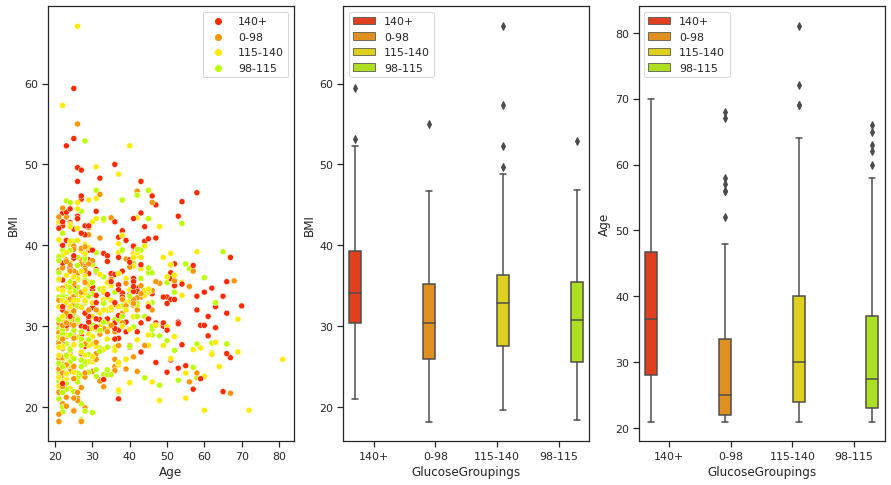

In [142]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="Age", y="BMI", hue=data1.GlucoseGroupings.tolist(), ax=axs[0], palette = 'prism')
sns.boxplot(data=data1, x="GlucoseGroupings", y="BMI", hue=data1.GlucoseGroupings.tolist(), ax=axs[1], palette = 'prism')
sns.boxplot(data=data1, x="GlucoseGroupings", y="Age", hue=data1.GlucoseGroupings.tolist(), ax=axs[2], palette = 'prism')
plt.show()
#A: no clear linear trend
#B: as GlucoseGrouping increases, mean BMI seems to increase as well, minimally
#C: as GlucoseGrouping increases, mean Age seems to increase as well, particularly with the [140+] grouping

In [143]:
ancova(data=data1, dv='BMI', covar='Age', between='GlucoseGroupings')
#takeaway: GlucoseGroupings lead to distinct means for BMI when keeping Age constant

Source            SS   DF          F         p-unc       np2
0  GlucoseGroupings   2231.129027    3  16.672128  1.685700e-10  0.061520
1               Age     61.608556    1   1.381111  2.402786e-01  0.001807
2          Residual  34035.876997  763        NaN           NaN       NaN

In [144]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='BMI', between='GlucoseGroupings', data = data1, effsize = 'cohen')) 
#shows the difference in means of BMI, largest is between [0-98] and [140+], supported by visual figures,
    #supported by cohen and p-value
#only one combination fails here, [0-98] and [98-115]

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  30.697364  32.876976 -2.179612  0.689118 -3.162903   
1     0-98     140+  30.697364  34.979381 -4.282017  0.696479 -6.148096   
2     0-98   98-115  30.697364  31.055030 -0.357666  0.694791 -0.514781   
3  115-140     140+  32.876976  34.979381 -2.102406  0.670750 -3.134409   
4  115-140   98-115  32.876976  31.055030  1.821946  0.668998  2.723395   
5     140+   98-115  34.979381  31.055030  3.924352  0.676578  5.800294   

        p-tukey     cohen  
0  8.802615e-03 -0.326261  
1  7.571392e-09 -0.640964  
2  9.555632e-01 -0.053538  
3  9.656212e-03 -0.314704  
4  3.337848e-02  0.272723  
5  5.805246e-08  0.587426  


In [145]:
print(pairwise_tukeyhsd(data1['BMI'], data1['GlucoseGroupings'], alpha = 0.05)) 
#shows the confidence intervals for the differencess in BMI, reject almost all null hypotheses that means are identical

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   0-98 115-140   2.1796 0.0088  0.4053  3.9539   True
   0-98    140+    4.282    0.0  2.4888  6.0752   True
   0-98  98-115   0.3577 0.9556 -1.4312  2.1465  False
115-140    140+   2.1024 0.0097  0.3754  3.8294   True
115-140  98-115  -1.8219 0.0334 -3.5444 -0.0995   True
   140+  98-115  -3.9244    0.0 -5.6663 -2.1824   True
------------------------------------------------------


In [146]:
posthoc = pg.pairwise_ttests(data=data1, dv='BMI', between='GlucoseGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc
#mostly similar to the results of the previous cell

Contrast        A        B  Paired  Parametric         T  \
0  GlucoseGroupings     0-98  115-140   False        True -3.131224   
1  GlucoseGroupings     0-98     140+   False        True -6.181187   
2  GlucoseGroupings     0-98   98-115   False        True -0.529853   
3  GlucoseGroupings  115-140     140+   False        True -3.054679   
4  GlucoseGroupings  115-140   98-115   False        True  2.717634   
5  GlucoseGroupings     140+   98-115   False        True  5.884041   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  373.142124   two-sided  1.878086e-03  3.608695e-03   fdr_bh     12.255   
1  364.976265   two-sided  1.702641e-09  1.021585e-08   fdr_bh   5.32e+06   
2  362.479650   two-sided  5.965382e-01  5.965382e-01   fdr_bh      0.132   
3  394.933287   two-sided  2.405797e-03  3.608695e-03   fdr_bh      9.641   
4  396.138797   two-sided  6.863632e-03  8.236358e-03   fdr_bh      3.822   
5  386.624362   two-sided  8.682347e-09  2.604704e-08   fdr_bh  1.117e+06   

     hedges  
0 -0.320883  
1 -0.642137  
2 -0.055057  
3 -0.305890  
4  0.271241  
5  0.594906

In [147]:
#research question 7:
    #try covariate = BMI since interaction term from two-way ANOVAs was significant in BMI-Glucose-Age triangle
        #of pairings
    #now alternating Groupings and dependent variable from combinations already seen

In [148]:
data1 = datafinal.copy()

data1 >> group_by(X.AgeGroupings) >> summarize(n=X['Glucose'].count(), mean=X['Glucose'].mean(), sd=X['Glucose'].std())
#generally, mean and standard deviation increase as AgeGroupings does

AgeGroupings    n        mean         sd
0         0-25  267  111.962291  26.874894
1        25-30  150  120.326667  26.573312
2        30-40  157  127.084838  31.823387
3          40+  194  131.795462  32.708350

In [149]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(data=data1, x="BMI", y="Glucose", hue=data1.AgeGroupings.tolist(), ax=axs[0], palette = 'gist_rainbow')
sns.boxplot(data=data1, x="AgeGroupings", y="Glucose", hue=data1.AgeGroupings.tolist(), ax=axs[1], palette = 'gist_rainbow')
sns.boxplot(data=data1, x="AgeGroupings", y="BMI", hue=data1.AgeGroupings.tolist(), ax=axs[2], palette = 'gist_rainbow')
plt.show()
#A: no clear linear trend
#B: as AgeGroupings increase, mean Glucose seems to increase as well, minimally and with large whiskers
#C: as AgeGroupings increase, mean BMI seems to remain fairly constant

In [150]:
ancova(data=data1, dv='Glucose', covar='BMI', between='AgeGroupings')
#takeaway: AgeGroupings lead to distinct means for Glucose when keeping BMI constant

Source             SS   DF          F         p-unc       np2
0  AgeGroupings   41389.938567    3  16.684226  1.657775e-10  0.061561
1           BMI   30854.356408    1  37.312044  1.603199e-09  0.046622
2      Residual  630945.710061  763        NaN           NaN       NaN

In [151]:
#post-hoc and effect metric tests

print(pg.pairwise_tukey(dv='Glucose', between='AgeGroupings', data = data1, effsize = 'cohen'))  
#shows the difference in means of Glucose, largest is between [0-25] and [40+], supported by visual figures,
    #supported by cohen and p-value
#two combinations fails here, [25-30] and [30-40] and [30-40] and [40+], makes sense from the figure as the 
    #distributions see overlap

       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-25  25-30  111.962291  120.326667  -8.364376  3.003195 -2.785159   
1   0-25  30-40  111.962291  127.084838 -15.122547  2.960017 -5.108939   
2   0-25    40+  111.962291  131.795462 -19.833171  2.776583 -7.143013   
3  25-30  30-40  120.326667  127.084838  -6.758171  3.360396 -2.011123   
4  25-30    40+  120.326667  131.795462 -11.468795  3.199996 -3.584003   
5  30-40    40+  127.084838  131.795462  -4.710624  3.159509 -1.490935   

        p-tukey     cohen  
0  2.802224e-02 -0.284195  
1  2.443775e-06 -0.513817  
2  1.298628e-11 -0.673869  
3  1.847086e-01 -0.229621  
4  2.036020e-03 -0.389674  
5  4.434578e-01 -0.160052  


In [152]:
print(pairwise_tukeyhsd(data1['Glucose'], data1['AgeGroupings'], alpha = 0.05)) 
#shows the confidence intervals for the differences in Glucose, reject almost all null hypotheses that means are 
    #identical, reject those mentioned above

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-25  25-30   8.3644  0.028  0.6321 16.0967   True
  0-25  30-40  15.1225    0.0  7.5014 22.7437   True
  0-25    40+  19.8332    0.0 12.6843  26.982   True
 25-30  30-40   6.7582 0.1847 -1.8938 15.4102  False
 25-30    40+  11.4688  0.002  3.2298 19.7078   True
 30-40    40+   4.7106 0.4435 -3.4241 12.8454  False
----------------------------------------------------


In [153]:
posthoc = pg.pairwise_ttests(data=data1, dv='Glucose', between='AgeGroupings',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
posthoc

Contrast      A      B  Paired  Parametric         T         dof  \
0  AgeGroupings   0-25  25-30   False        True -3.072171  311.771578   
1  AgeGroupings   0-25  30-40   False        True -4.997834  284.892418   
2  AgeGroupings   0-25    40+   False        True -6.917734  365.051997   
3  AgeGroupings  25-30  30-40   False        True -2.023178  299.676375   
4  AgeGroupings  25-30    40+   False        True -3.587113  341.142887   
5  AgeGroupings  30-40    40+   False        True -1.361821  337.417104   

  alternative         p-unc        p-corr p-adjust       BF10    hedges  
0   two-sided  2.312488e-03  3.468732e-03   fdr_bh     10.277 -0.311923  
1   two-sided  1.013814e-06  3.041442e-06   fdr_bh  1.449e+04 -0.524093  
2   two-sided  2.066007e-11  1.239604e-10   fdr_bh  4.669e+08 -0.671923  
3   two-sided  4.394236e-02  5.273083e-02   fdr_bh      0.882 -0.229491  
4   two-sided  3.832363e-04  7.664727e-04   fdr_bh     52.879 -0.379064  
5   two-sided  1.741630e-01  1.741630e-01   fdr_bh      0.288 -0.145455

In [155]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

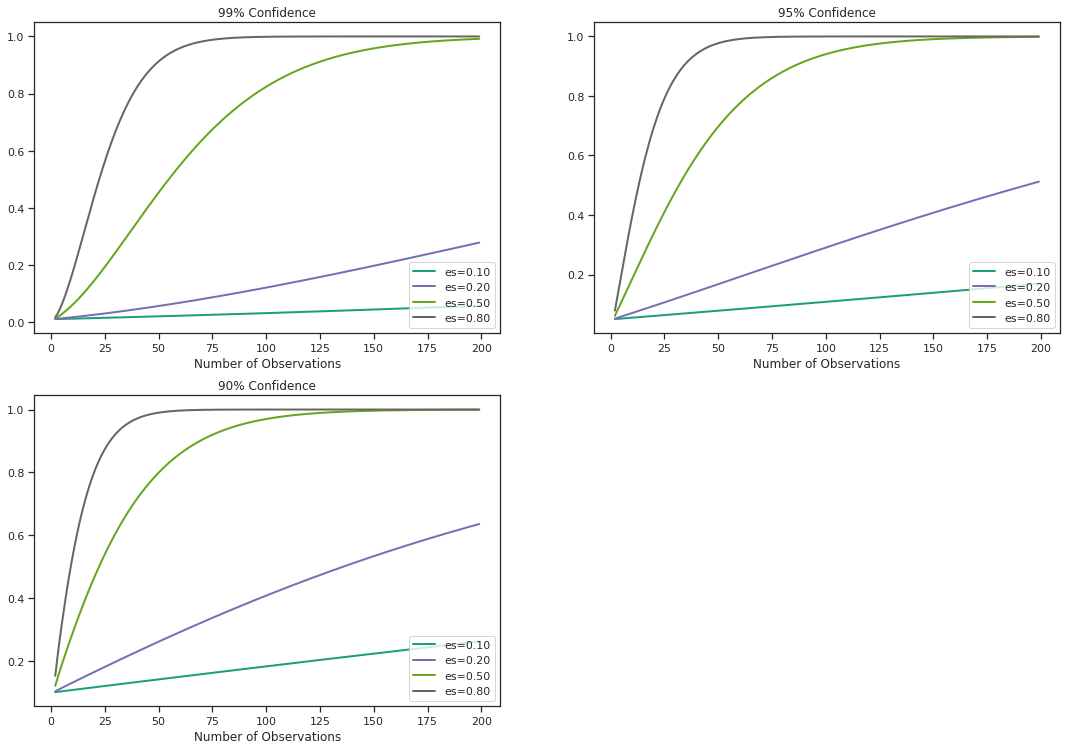

In [156]:
#want to visualize how power changes given changes of alpha, effect size:

fig = plt.figure()
ax = fig.add_subplot(2,2,1) #2x2 plot, first quadrant
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200), #number of observations, nobs
                               effect_size=np.array([0.1,0.2,0.5,0.8]), #effect sizes
                               alpha=0.01, #alpha value
                               ax =ax, title='99% Confidence')
ax = fig.add_subplot(2,2,2) #2x2 plot, second quadrant
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=np.array([0.1,0.2,0.5,0.8]),
                               alpha=0.05,
                               ax =ax, title='95% Confidence')
ax = fig.add_subplot(2,2,3) #2x2 plot, third quadrant
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=np.array([0.1,0.2,0.5,0.8]),
                               alpha=0.10,
                               ax =ax, title='90% Confidence')
fig.subplots_adjust(top = 2.5, right = 2.5) #size

In [157]:
#power of the whole dataset:

#power is the probability of detecting a treatment, if present (so 1-Probability of not detecting a treatment,
    #if present) = 1-P(Type II error) = P(rejecting H0 | H1 = True) = 1 - P(failing to reject H0 | H1 = True)

#these are the parameters I am considering, firstly to predict the number of observations needed to achieve 0.9 power:
effect_size = 0.5
alpha = 0.05
power = 0.9
nobs = len(data1)

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size,
                                        power = power,
                                        alpha = alpha)
print('Sample Size required is:{0:.2f}'.format(sample_size)) #n required for 0.9 power in this experiment

#secondly, to calculate the power using the total number of observations in this dataset:
power_calc = TTestIndPower()
power = power_calc.power(effect_size, nobs, alpha = 0.05, df=None, alternative='two-sided')
print('Power is:{0:.2f}'.format(power)) #power using our dataset and number of observations
#power is presumably >0.999 since the sample size is large (larger than the 86 observations required for 0.9 power)

Sample Size required is:85.03
Power is:1.00


In [158]:
#power for the ANCOVAs:

#in the ANCOVAs I was examining the interactions and relationships between Glucose, BMI, Age, and one ANCOVA contained
    #Outcome
#more precise calculations for power for these examples require using the frequency of observations for each
    #grouping
#I know from the above cell that 86 observations are required for power of 0.9 at a 0.5 effect size, 0.05 alpha

effect_size = 0.5

def power(column_name):
    nobs_list = datafinal[column_name].value_counts() #counting nobs for each grouping of the column of interest
    i=0
    power_list = []
    while i < len(nobs_list):
        nobs = nobs_list[i] #iterating through the groupings for a column
        power_calc = TTestIndPower()
        power = power_calc.power(effect_size, nobs, alpha = 0.05, df=None, alternative='two-sided') #calculate power
        power_list.append(power) #add to a list for that column
        i+=1
    return power_list

#powers for each groupings/class from smallest to largest in numeric value:
print('Power for GluocseGroupings is ' + str(power('GlucoseGroupings')))
print('Power for BMIGroupings is ' + str(power('BMIGroupings'))) #Power of the [30+] grouping is less than acceptable
print('Power for AgeGroupings is ' + str(power('AgeGroupings')))
print('Power for InsulinGroupings is ' + str(power('InsulinGroupings')))
print('Power for Outcome class is ' + str(power('Outcome')))

Power for GluocseGroupings is [0.998913049282134, 0.9985472217194039, 0.998422285564042, 0.9965761668763191]
Power for BMIGroupings is [1.0, 0.9972031305508982, 0.9360778176669111, 0.24706608734933327]
Power for AgeGroupings is [0.9999295642939184, 0.998422285564042, 0.9929826052344464, 0.9907677057451874]
Power for InsulinGroupings is [1.0, 0.9917888795182082, 0.9841602994264016, 0.9501286968557989]
Power for Outcome class is [1.0, 0.9999325815754376]


In [159]:
@np.vectorize
def power_grid(a,b):
    power = TTestIndPower().solve_power(effect_size = a, 
                                        nobs1 = b, 
                                        alpha = 0.05)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), #gives evenly spaced numbers between these boundaries
                  np.linspace(10, 1000, 100)) #gives evenly spaced numbers between these boundaries
X = X.T #transform
Y = Y.T #transform

Z = power_grid(X, Y) #applying function to determine powers, becomes z-axis

data = [Surface(x = X, y= Y, z = Z)] #x is effect_size, y is nobs, z is power

layout = Layout(
    title='Power Analysis 3D Universe',
    scene = dict(xaxis = dict(title='Effect Size'),
                 yaxis = dict(title='Number of Observations'),
                 zaxis = dict(title='Power'),)
)

fig = Figure(data=data, layout=layout)
iplot(fig)

In [132]:
#time to start the writeup!